# **Latar Belakang Penelitian**

Seorang peneliti bidang pemasaran perbankan tertarik untuk mengamati pertumbuhan e-commerce di negara Pakistan. Perbankan tempat peneliti tersebut bekerja, berencana untuk memperluas pangsa pasar ke Pakistan, serta menyusun strategi untuk menciptakan produk perbankan khusus e commerce yang disesuaikan oleh perilaku transaksi warga Pakistan. 

Berdasarkan website https://ecommercedb.com/markets/pk/all, Pakistan adalah negara dengan pangsa pasar e-commerce ke 47 terbesar dan menghasilkan pendapatan hingga US$ 6,632 juta pada tahun 2023, dan pertumbuhan pangsa pasarnya mencapai 6.2 % per tahun.

Peneliti tersebut menggunakan data sample transaksi dari perusahaan E-Commerce terbesar di Pakistan yang akan dianalisa untuk mendapatkan insights mengenai perilaku belanja warga Pakistan saat menggunakan e-commerce.



# **Tinjauan Teori**
Selain pengalaman dan pengetahuan terhadap sektor industri perbankan dan pemasaran, peneliti memaparkan **conceptual framework** dari disiplin ilmu **Consumer Behavior**, secara khusus yaitu **E-commerce-consumer-behavior-model (Chan, 2005)*** yang akan dipakai untuk mengidentifikasi variabel yang akan mempengaruhi pola belanja konsumen, untuk mencari pengukuran variabel yang akan menjadi dasar dari rumusan pertanyaan dan permasalahan.

Dapat kita lihat pada bagan, faktor-faktor kunci yang mempengaruhi keputusan pembelian konsumen e-commerce meliputi :


1.   **Stimuli** : yaitu Harga, Produk, Kualitas, dan Promosi
2.   **Personal** : Usia, gender
3.   **Lingkungan** : pengaruh keluarga dan status sosial
4.   **Teknologi** : media untuk melakukan pembelian, misalnya gadget atau telepon
5.   **Logistik** : yaitu kemudahan dalam melakukan pembayaran (misalnya bisa membayar secara online) maupun lama pengantaran barang yang dibeli.

Ke-lima hal diatas akan mempengaruhi keputusan konsumen untuk membeli produk dalam E-Commerce. Sehingga ke-lima di atas yang akan membantu peneliti untuk mengukur perilaku pembelian E-Commerce warga Pakistan.


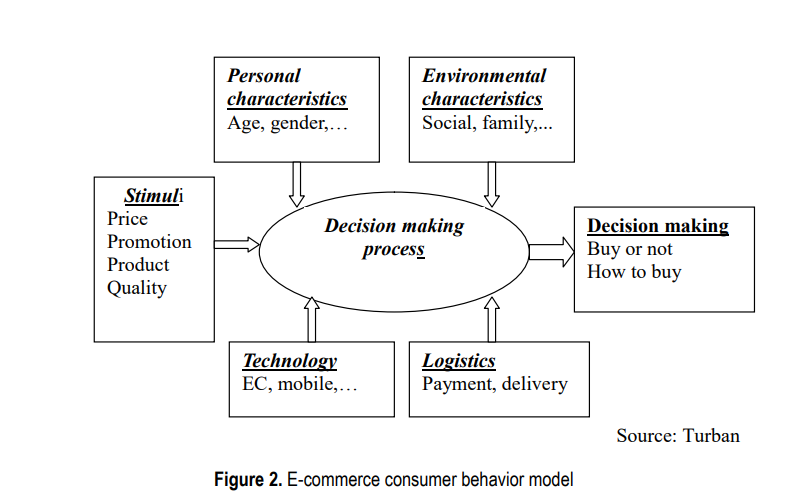


Selain itu peneliti melakukan research internet mengenai layanan perbankan yang terdapat pada Pakistan, untuk mengetahui peta persaingan produk perbankan di wilayah Pakistan.

**Rujukan :**

**) Chan, Chu-Chai Henry (2005). Online Auction Customer Segmentation Using
a Neural Network Model. International Journal of Applied Science and Engineering 2005.3,2: 101-109*

PDF source :[link text](https://www.researchgate.net/publication/228939097_Online_auction_customer_segmentation_using_a_neural_network_model/link/5444ef960cf2a76a3ccdc4a0/download)

# **Rumusan Masalah**
Sesuai dengan latar belakang yang dipaparkan sebelumnya, peneliti perlu menemukan jawaban atas pertanyaan kunci yang diperlukan sehingga peneliti dapat mengetahui **Perilaku Belanja E-Commerce Warga Pakistan** dan **"Produk Perbankan E-Commerce apa yang dibutuhkan warga Pakistan?"** :


1.   **Stimuli** : Apa saja jenis item / barang / jasa yang paling sering dibeli Warga Pakistan melalui *E-Commerce*?
2. **Personal Characteristics** : Bagaimana demografi pembeli yang belanja di E-Commerce Pakistan?
2. **Personal Characteristics** : Berapa daya beli rata-rata yang dimiliki Warga Pakistan?
3. **Logistik & Technology** : Apa metode bayar yang paling sering digunakan Warga Pakistan untuk belanja *E-Commerce*?
4. **Behavioral Pattern** : Bagaimana kurva perilaku belanja Warga Pakistan dalam satu periode (bulan, kuartal, tahun) sejak mereka memiliki akun *E-Commerce*?
5. **Environment** : Bagaimana kondisi layanan perbankan di negara Pakistan dan produk perbankan apa yang populer di Pakistan?

# **Data**
Pada langkah pertama, peneliti akan mengimpor data Pakistan E-Commerce yang diperlukan yang kemudian akan dilanjutkan dengan proses pemahaman dan pembersihan data.

In [ ]:
# import library yang diperlukan untuk pengolahan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as st
from google.colab import files

import warnings
warnings.filterwarnings("ignore")
print('Modul berhasil di import')

In [ ]:
# membuka batasan terhadap jumlah maksimal kolom dan baris yang dapat ditambilkan
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)
print('Konfigurasi selesai dilakukan')

In [ ]:
# ambil table dari google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# assign table hasil baca pandas ke dalam data frame Pakistan
df_pakistan =pd.read_csv('/content/drive/My Drive/csv_pakistan/Pakistan Largest Ecommerce Dataset.csv', encoding = 'utf-8')
print('Table berhasil dibuat')

In [ ]:
# menampilkan data paling awal dan data paling akhir dari table Pakistan
display(df_pakistan.head(),df_pakistan.tail())

## Understanding The Data

Pada tahap ini, peneliti akan memahami *field* dan kolom-kolom data, memahami informasi yang dipaparkan oleh data, kemudian mengidentifikasi terhadap anomali-anomali data yang muncul.

### General Exploration

Pada tahap ini, peneliti mencoba mengeksplorasi data secara keseluruhan dan general.

In [ ]:
# mengetahui ukuran columns dan baris dari Data Frame
print(f'Data ini memiliki jumlah baris sebanyak {df_pakistan.shape[0]} dan {df_pakistan.shape[1]} kolom')

In [ ]:
# mengetahui nama kolom-kolom yang tersedia dalam Data Frame
kolom = df_pakistan.columns
print(f'Jadi kolom yang tersedia dalam dataset Pakistan adalah : \n {kolom}')

In [ ]:
# menghapus nama kolom dengan spasi di awal dan di akhir agar data lebih mudah di olah

df_pakistan.columns = kolom.str.strip()
df_pakistan.columns

In [ ]:
# mengetahui info kolom dari dataframe pakistan

df_pakistan.info()

In [ ]:
# menghapus value space yang tidak kelihatan dari setiap kolom

for col in df_pakistan.select_dtypes(include = 'object').columns:
    if df_pakistan[col].dtype == 'object':
      df_pakistan[col] = df_pakistan[col].apply(lambda x : x.strip() if isinstance(x, str) else x)

### Identifying Duplicates

Pada tahap ini, peneliti mencoba mengidentifikasi duplikasi nilai duplikat, terutama pada data *customer_id*, *item_id* dan juga *increment_id*, untuk melihat apakah kolom tersebut adalah identifier data yang unik, yang dapat membantu peneliti dalam melakukan analisa.


In [ ]:
#cek data duplikat pada kolom item_id (True Check)

df_duplikat_item = df_pakistan.duplicated(['item_id'])
df_pakistan[df_duplikat_item == True].head(25)

In [ ]:
#cek data duplikat pada kolom item_id (False Check)

df_duplikat_item = df_pakistan.duplicated(['item_id'])
df_pakistan[df_duplikat_item == False].head(25)

In [ ]:
#cek data duplikat pada kolom increment_id (True Check)

df_duplikat_increment = df_pakistan.duplicated(['increment_id'])
df_pakistan[df_duplikat_increment== True].head(6)

In [ ]:
#cek data duplikat pada kolom Customer ID (False Check)

df_duplikat_customer = df_pakistan.duplicated(['Customer ID'])
df_pakistan[df_duplikat_customer == False].head(6)

In [ ]:
#cek data duplikat pada kolom Customer ID dan pada increment_id

df_duplikat_combine = df_pakistan.duplicated(subset = ['Customer ID','increment_id'])
df_pakistan[(df_duplikat_combine==True) & (df_pakistan['Customer ID'] == 13.0)].head(10)[['Customer ID','increment_id']]

In [ ]:
# cek sekilas data null dari df_pakistan pada setiap kolom
df_pakistan.isna().sum()

In [ ]:
#cek data duplikat dilihat dari semua entry yang ada (kecuali item_id)

df_duplikat_all = df_pakistan.duplicated(subset = ['status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'])
df_pakistan[(df_duplikat_all==True) & (df_pakistan['item_id'].notnull())].head(20)

**Catatan Penting :**

Seperti dilihat pada bagian sebelumnya peneliti mencoba identifikasi kolom yang memiliki format dan nilai yang unik. Hasil analisa menunjukkan bahwa:

1. **item_id**, bersifat unik, dan akan diubah menjadi kolom dengan format integer. Ditemukan dari analisa sebelumnya, satu-satunya baris ketika **item_id** tidak unik ketika valuenya berisi NaN alias Null, untuk penanganan Null Value ini akan kita lakukan di tahap selanjutnya.
2. **increment_id**, tidak unik dan berdasarkan checking dengan kolom **Customer ID** menunjukkan bahwa kolom ini menunjukkan kode transaksi setiap pembelian customer. Kolom ini kemungkinan besar bertindak sebagai **primary key** dari tabel ini. Namun, kolom ini tidak unik karena bisa saja satu transaksi terdiri atas pembelian dua barang yang berbeda, sehingga transaksi yang sama akan menjadi entry data yang berbeda.
3. **Customer ID**, kolom ini tidak unik, karena setiap customer bisa melakukan lebih dari satu kali transaksi. 
4. Setelah dilakukan **grouping** dengan mengecualikan **item_id** yang dianggap / dicurigai akan menyimpan kode unik pada setiap entry baris data, ditemukan transaksi-transaksi dengan nilai yang antara satu record dengan record lainnya persis sama pada setiap kolomnya. Peneliti menyimpulkan entry seperti ini sebagai duplikat, dan **perlu dihapus**. Penghapusan ini akan kita lakukan, bersamaan dengan tahap selanjutnya.




### Identifying Anomalies : Null Columns & Rows

Pada tahap ini, peneliti mencoba mengenali anomali kolom dan baris yang entrynya Null, dan akan melakukan tindakan penghapusan apabila ditemukan ada kolom dan baris yang sama sekali kosong.



In [ ]:
# mengetahui proporsi jumlah baris Null atau NaN di tiap kolom terhadap jumlah baris keseluruhan
df_percentage = (df_pakistan.isna().sum()/df_pakistan.shape[0]).sort_values(ascending = False).reset_index()
df_percentage.columns = ['nama kolom','persentase']
df_percentage

In [ ]:
# mengetahui jumlah data Null atau Nan pada tiap kolom DataFrame
df_null = df_pakistan.isna().sum().reset_index()
df_null.columns=['nama_kolom','jumlah_null']
df_null = df_null.sort_values('jumlah_null', ascending = True)
df_null

In [ ]:
# melihat peta persebaran nilai null pada kolom
plt.figure(figsize = (10,20))

sns.heatmap(df_pakistan[['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25']].T.isna(),yticklabels='auto', cmap="viridis")

In [ ]:
#melihat nilai unik pada setiap kolom 
# part 1 : listing setiap nama kolom dan value yang ingin ditunjukkan

list_item = []

for col in df_pakistan.columns :
     list_item.append([col,df_pakistan[col].head(500000).nunique(), df_pakistan[col].head(500000).unique()])

# Part 2 : Menjadikan setiap value menjadi kolom terstruktur

df_check = pd.DataFrame(columns = ['kolom','nilai_unik','data_unik'], data = list_item)
df_check

Berdasarkan deskripsi nilai NaN di atas, dapat melihat bahwa proporsi value NaN pada setiap kolom terhadap jumlah baris secara keseluruhan sangat besar, di atas 40 % (Kisaran antara 44.25 % hingga 100 %). 

Berdasarkan pattern yang muncul dan kita sudah bahas sebelumnya, data NaN terjadi sepenuhnya di 5 kolom terakhir dengan nama **Unnamed : (1-5)**, sehingga di tahap selanjutnya kita dapat drop kolom tersebut.

Namun, seperti yang kita lihat sebelumnya, value NaN juga dapat kita temukan dalam kolom *tail*. Peneliti menemukan bahwa pada tail data sepenuhnya alias 100 % kosong.Sebelum kita dapat memutuskan tindakan penghapusan atau pengisian data tersebut, kita harus menjawab 2 pertanyaan yaitu :


1.   Pada kolom ke berapa nilai NaN mulai terjadi pada setiap baris data dalam kolom?
2.   Apakah nilai NaN terjadi pada semua kolom dengan index yang sama?



In [ ]:
# melihat nilai index pada data null yang muncul bersamaan pada setiap kolom

df_null = df_pakistan[
      (df_pakistan['item_id'].isna()) &
      (df_pakistan['status'].isna()) &
      (df_pakistan['created_at'].isna()) &
      (df_pakistan['sku'].isna()) &
      (df_pakistan['price'].isna()) &
      (df_pakistan['qty_ordered'].isna()) &
      (df_pakistan['grand_total'].isna()) &
      (df_pakistan['increment_id'].isna()) &
      (df_pakistan['category_name_1'].isna()) &
      (df_pakistan['sales_commission_code'].isna()) &
      (df_pakistan['discount_amount'].isna()) &
      (df_pakistan['payment_method'].isna()) &
      (df_pakistan['Working Date'].isna()) &
      (df_pakistan['BI Status'].isna()) &
      (df_pakistan['MV'].isna()) &
      (df_pakistan['Year'].isna()) &
      (df_pakistan['Month'].isna()) &
      (df_pakistan['Customer Since'].isna()) &
      (df_pakistan['M-Y'].isna()) &
      (df_pakistan['FY'].isna()) &
      (df_pakistan['Customer ID'].isna()) &
      (df_pakistan['Unnamed: 21'].isna()) &
      (df_pakistan['Unnamed: 22'].isna()) &
      (df_pakistan['Unnamed: 23'].isna()) &
      (df_pakistan['Unnamed: 24'].isna()) &
      (df_pakistan['Unnamed: 25'].isna())
].index

df_null

Berdasarkan analisa sebelumnya, maka jawaban atas 2 pertanyaan itu yaitu :


  1. **Kolom**

      Nan pada baris dimulai pada kolom : 

        1. **Unnamed:21**, 
        2. **Unnamed:22**, 
        3. **Unnamed:23**, 
        4. **Unnamed:24**, 
        5. **Unnamed:25**
        
  *   Terjadi pada setiap baris dengan index yang sama? **YA**

  2. **Baris**
  *   Nan pada baris dimulai pada kolom : **584,524 - 1,048,574**
  *   Terjadi pada setiap kolom dengan index yang sama? **YA**

**Penanganan** :

Hapus baris dan kolom yang kosong, lanjut ke tahap berikutnya.

### Removing Null Values & Duplicate Records

Walaupun peneliti belum memasuki tahap data cleansing yang sebenarnya. Tapi peneliti merasa, ada baiknya untuk menghapus kolom maupun baris yang sama sekali tidak mempunyai nilai (Null). Ini dilakukan, agar dalam proses data cleansing yang lebih detail, hal ini tidak membuat kebingungan dan membuat data yang diolah menjadi lebih sederhana.


#### Removing Null Values

In [ ]:
# membuat dataframe dengan baris NaN ke 584,524 - 1,048,574
df_pakistan_dropna = df_pakistan.copy().drop(df_null)

# drop kolom unnamed
df_pakistan_dropna = df_pakistan_dropna.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],axis = 1)

In [ ]:
# Cek ukuran table df_pakistan_dropna
df_pakistan_dropna.shape

In [ ]:
# Cek nama kolom df_pakistan_dropna
df_pakistan_dropna.columns

In [ ]:
#Cek jumlah null pada table pakistan yang sudah dibersihkan

df_pakistan_dropna.isna().sum()

In [ ]:
#Cek proporsi jumlah null pada table pakistan yang sudah dibersihkan
df_pakistan_dropna.isna().sum()/df_pakistan_dropna.shape[0]

#### Removing Duplicates

In [ ]:
# menghapus nilai duplikat dikelompokkan berdasarkan keseluruhan kolom selain item_id
df_pakistan_dropna = df_pakistan_dropna.drop_duplicates(subset = ['status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'])

In [ ]:
#cek data duplikat kembali

df_duplikat_all = df_pakistan_dropna.duplicated(subset = ['status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'])
df_pakistan_dropna[(df_duplikat_all==True) & (df_pakistan_dropna['item_id'].notnull())].head(20)

In [ ]:
# melihat info data setelah duplikat dihapus
df_pakistan_dropna.shape

In [ ]:
# cek sekilas data null dari df_pakistan pada setiap kolom
df_pakistan_dropna.isna().sum()

Peneliti sudah berhasil melakukan pembersihan data dari kolom dan baris yang memiliki nilai Null sepenuhnya.

Namun seperti terlihat pada analisa, masih ditemukan kolom null terutama pada kolom 


*   **status** : 15 missing value
*   **sku**    : 20 missing value
*   **category_name_1** : 164 missing value
*   **sales_commission_code** : 137,050 missing value
*   **Customer Since**: 11 missing value
*   **Customer ID** : 11 missing value

Mengenai penanganan missing value ini, nantinya akan diulas kembali oleh peneliti ketika sudah memasuki tahap data cleansing.

### Identifying Data Format Problems

Sebelum melakukan analisa data, format data akan berpengaruh penting terhadap lancarnya proses analisa data, untuk menghindari permasalahan format data saat melakukan analisa nantinya, terlebih dahulu peneliti mengidentifikasi apabila ada kolom data yang tidak sesuai format.


In [ ]:
# mengetahui tipe data yang ada dalam data frame Pakistan
df_info = df_pakistan_dropna.info()
df_info

Pada keterangan dataset diatas ditemukan bahwa ada sebagian kolom yang formatnya datanya tidak sesuai valuenya. Antara lain :

1. **item_id** : tipenya float, seharusnya bertipe string.
2. **created_at** : tipenya object, seharusnya bertipe datetime.
3. **increment_id** : tipenya object, seharusnya bertipe integer.
4. **Working Date** : tipenya object, seharusnya bertipe datetime.
5. **MV** : tipenya object, seharusnya bertipe angka float, karena menggambarkan nilai rupiah dari transaksi
6. **Customer Since** : tipenya object, seharusnya bertipe datetime.

Untuk itu, sebaiknya perubahan data ini kita lakukan sebelum kita melakukan analisa lebih lanjut, karena perubahan ini akan mempermudah kita untuk menentukan treatment pada setiap kolom.

Sebelumnya harus dpastikan sebelum mengubah kolom ini bahwa tidak ada karakter spesial yang akan menjadi kendala peneliti mengubah format kolom.



### Changing Data Format


In [ ]:
#Mengubah data bertipe object terlebih dahulu ke dalam string

for col in df_pakistan_dropna[['created_at', 'increment_id','MV', 'Working Date','Customer Since']].columns:
    df_pakistan_dropna[col] = df_pakistan_dropna[col].astype(str)

In [ ]:
#Cek kolom increment_id apabila ada karakter khusus yang tidak sesuai format

for col in df_pakistan_dropna[['created_at', 'increment_id','MV', 'Working Date','Customer Since']].columns:
    has_hyphen = df_pakistan_dropna[col].str.contains('-')
    has_underscore = df_pakistan_dropna[col].str.contains('_')
    has_comma = df_pakistan_dropna[col].str.contains(',')


In [ ]:
#menghapus spasi yang tidak terlihat data yang akan kita ubah formatnya
for col in df_pakistan_dropna[['created_at', 'increment_id','MV', 'Working Date','Customer Since']].columns:
    df_pakistan_dropna[col] = df_pakistan_dropna[col].str.strip().str.replace(',', '')

In [ ]:
# Mengubah data pada pada dataframe sesuai dengan format dan value

df_pakistan_dropna['sales_commission_code'].replace("\\N",np.nan)
df_pakistan_dropna['item_id'] =  df_pakistan_dropna['item_id'].astype(int).astype(str)
df_pakistan_dropna['created_at'] = pd.to_datetime(df_pakistan_dropna['created_at']).dt.strftime('%Y-%m-%d')
df_pakistan_dropna['increment_id'] =  df_pakistan_dropna['increment_id'].astype(str)
df_pakistan_dropna['price'] =  df_pakistan_dropna['price'].astype(float).round(2)
df_pakistan_dropna['grand_total'] =  df_pakistan_dropna['grand_total'].astype(float).round(2)
df_pakistan_dropna['MV'] = df_pakistan_dropna['MV'].replace('-', '0')
df_pakistan_dropna['MV'] =  df_pakistan_dropna['MV'].astype(float).round(2)
df_pakistan_dropna['discount_amount'] =  df_pakistan_dropna['discount_amount'].astype(float).round(2)
df_pakistan_dropna['Working Date'] = pd.to_datetime(df_pakistan_dropna['Working Date']).dt.strftime('%Y-%m-%d') 
df_pakistan_dropna['Customer Since'] = pd.to_datetime(df_pakistan_dropna['Customer Since']).dt.strftime('%Y-%m-%d')  
df_pakistan_dropna['Customer ID'] =  df_pakistan_dropna['Customer ID'].apply(lambda x : str(int(x)) if not np.isnan(x) else np.nan)
df_pakistan_dropna['qty_ordered'] =  df_pakistan_dropna['qty_ordered'].astype(int)
df_pakistan_dropna['Year'] =  df_pakistan_dropna['Year'].astype(int)
df_pakistan_dropna['Month'] =  df_pakistan_dropna['Month'].astype(int)
df_pakistan_dropna['M-Y'] = pd.to_datetime(df_pakistan_dropna['M-Y']).dt.strftime('%Y-%m')



print('Format Data Berhasil Diubah')


In [ ]:
# melakukan fungsi upper ke beberapa kolom, agar data yang dikeluarkan lebih terstandarisasi

for col in df_pakistan_dropna[['status', 'category_name_1', 'sku','payment_method', 'sales_commission_code','BI Status']].columns :
       df_pakistan_dropna[col] = df_pakistan_dropna[col].apply (lambda x : x.upper() if isinstance(x, str) else x)

In [ ]:
# mengubah keterangan /N maupun #REF! menjadi NaN sesuai poin pada bagian sebelumnya

df_pakistan_dropna['status'].replace("\\N",np.nan,inplace = True)
df_pakistan_dropna['category_name_1'].replace("\\N",np.nan,inplace = True)
df_pakistan_dropna['sales_commission_code'].replace("\\N",np.nan,inplace = True)
df_pakistan_dropna['sales_commission_code'].replace("NAN",np.nan,inplace = True)
df_pakistan_dropna['BI Status'].replace("#REF!",np.nan,inplace = True)

In [ ]:
# melihat nilai unik kolom setelah perubahan
# part 1 : listing setiap nama kolom dan value yang ingin ditunjukkan

list_item = []

for col in df_pakistan_dropna.columns :
     list_item.append([col,df_pakistan_dropna[col].head(500000).nunique(), df_pakistan_dropna[col].head(500000).unique()])

# Part 2 : Menjadikan setiap value menjadi kolom terstruktur

df_check = pd.DataFrame(columns = ['kolom','nilai_unik','data_unik'], data = list_item)
df_check

In [ ]:
df_pakistan_dropna.isna().sum()

In [ ]:
#simpan data bersih ke google drive -- cadangan runtime error

df_pakistan_dropna.to_csv('/content/drive/My Drive/csv_pakistan/Pakistan Largest Ecommerce Dataset (Cleaned).csv', encoding = 'utf-8',index=False)
df_pakistan_dropna.to_excel('/content/drive/My Drive/csv_pakistan/Pakistan Largest Ecommerce Dataset (Cleaned).xlsx', encoding = 'utf-8',header = False, index=False)

Kita melihat, bahwa banyak kolom yang tidak sesuai valuenya juga bernilai NAN, sehingga pandas tidak mengenali value tersebut menjadi null. Nantinya kita akan ganti data ini pada tahapan data cleaning. Setelah data sudah berhasil kita ubah formatnya, sekarang kita akan masuk menuju tahap analisa data secara deskriptif, untuk mengetahui pola yang muncul.

### Understanding the Data Distribution

Pada tahap ini, peneliti mencoba mengenali anomali data yang terjadi dengan bantuan tools statistik deskriptif.


In [ ]:
df_pakistan_dropna.columns

In [ ]:
# melakukan statistik deskriptif untuk mempelajari sebaran data Pakistan

df_pakistan_describe_num = df_pakistan_dropna.describe().round(0)
df_pakistan_describe_cat = df_pakistan_dropna.describe(include = 'object').round(0)
display(df_pakistan_describe_num,df_pakistan_describe_cat)


In [ ]:
df_pakistan_describe_num.loc['range'] = df_pakistan_describe_num.loc['max'] - df_pakistan_describe_num.loc['min']
df_pakistan_describe_num.loc['LOWER_FENCE'] = df_pakistan_describe_num.loc['25%'] - 1.5 * df_pakistan_describe_num.loc['25%']
df_pakistan_describe_num.loc['UPPER_FENCE'] = df_pakistan_describe_num.loc['75%'] + 1.5 * df_pakistan_describe_num.loc['75%']
df_pakistan_describe_num.loc['IQR'] = df_pakistan_describe_num.loc['75%'] - df_pakistan_describe_num.loc['25%']

In [ ]:
df_pakistan_describe_num

In [ ]:
# melihat distribusi data dengan normalitas pada setiap kolom
plt.figure(figsize = (15,7))

for col in df_pakistan_dropna.select_dtypes(include='number').columns:
    sns.histplot(df_pakistan_dropna[col], kde = True)
    plt.title(f'Sebaran data {col}')
    plt.xlabel(f'{col}')
    plt.xticks(rotation = 20)
    plt.ylabel('Frekuensi')
    plt.show()

In [ ]:
# melihat distribusi data dengan boxplot pada setiap kolom

plt.figure(figsize = (40,7))

for col in df_pakistan_dropna[['price','qty_ordered','grand_total','discount_amount','MV']].columns:
    sns.boxplot(df_pakistan_dropna, x = f'{col}')
    plt.title(f'Sebaran data {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frekuensi')
    plt.show()

In [ ]:
# melihat korelasi antar data numerik dengan pair plot
sns.pairplot(df_pakistan_dropna[['price','qty_ordered','grand_total','discount_amount','MV','Year','Month']])
plt.show()

### Summary of Dataset


**Gambaran Besar Dataset**

1. Format dataset sudah diperbaiki sesuai valuenya pada setiap kolomnya. Ada beberapa kolom string yang valuenya diubah menjadi upper untuk mempermudah pembacaan dan pengkategorian. Peneliti juga sudah mengidentifikasi baris/record yang dicurigai dan dianggap sebagai duplikat dan sudah di drop.

2. Pada kolom numerik **price,qty_ordered,grand_total dan	discount_amount	MV**, peneliti menemukan distribusi data yang tidak bisa peneliti anggap normal, dataset mempunyai outliers yang sangat besar (dapat dilihat pada boxplot), sebaran data kebanyakan berada jauh dibawah nilai tertinggi (dapat dilihat pada distribution plot), dan median < mean (lihat pada deskripsi kolom numerik). Dapat disimpulkan bahwa **nilai mean tidak bisa merepresentasikan data, karena adanya outliers yang sangat besar**. Mengenai ini akan kita tangani di bagian selanjutnya.

3. Perlu dibuat beberapa kolom tambahan terutama untuk kategori status dan metode pembayaran agar pengkategorian menjadi lebih sederhana dan lebih jelas.

4. Dataset sudah kita bersihkan dari baris dan kolom yang kosong dan memiliki jumlah baris sebanyak 584,330 baris dan 21 kolom setelah dibersihkan.

5.   Sehingga pengelompokkan data numerikal dan kategorikalnya sebagai berikut :

    *   **Kolom Kategorikal :**  
          * status - kategorikal              
          * sku - kategorikal            
          * increment_id - ordinal text  
          * category_name_1 - kategorikal
          * sales_commission_code - kategorikal
          * payment_method - kategorikal   
          * BI Status - kategorikal    
          * M-Y - ordinal text           
          * F-Y - ordinal text        
          * Customer ID - ordinal text

    *   **Kolom Numerikal :**
          * item_id - numerikal interval      
          * created_at (tanggal) - numerikal rasio
          * price - numerikal rasio        
          * qty_ordered - numerikal rasio     
          * grand_total - numerikal rasio     
          * discount_amount - numerikal rasio
          * Customer Since  - numerikal rasio
          * MV - numerikal rasio
          * Working Date - numerikal rasio
          * Year - numerikal rasio    
          * Month  - numerikal rasio         
      
6.  Kolom tersebut beserta penjelasan isinya terdiri dari 
  * **item_id**         : berisi kode unik item yang di transaksikan
  * **status**          : data *stock keeping unit* yang berisi kombinasi angka dan huruf untuk tracking progress transaksi. Pada **status** kita menemukan data bernilai "\N" yang artinya tidak ada data pada kolom tersebut. Data ini sudah diganti dengan nilai **"NaN"**.
  * **created_at**      : berisi data tanggal transaksi dilakukan
  * **sku**             : berisi keterangan lebih detail dari transaksi yang dilakukan
  * **price**           : berisi data harga produk 
  * **qty_ordered**     : berisi data jumlah / kuantitas produk
  * **grand_total**     : berisi data nilai total transaksi produk
  * **increment_id**    : 
  * **category_name_1** : berisi kategori jenis produk. Pada **category_name** kita menemukan data bernilai "\N" yang artinya tidak ada data pada kolom tersebut. Data ini sudah diganti dengan nilai **"NaN"**.
  * **sales_commission_code** : berisi kode sales / referral / channel dari mana transaksi tersebut berasal (jika ada). Pada **sales_commision_code** kita menemukan data bernilai "\N" yang artinya tidak ada data pada kolom tersebut. Data ini sudah diganti dengan nilai **"NaN"**.
  * **discount_amount**: berisi data nilai potongan diskon dari transaksi
  * **payment_method** :  berisi data metode pembayaran transaksi
  * **Working Date**   : berisi data tanggal hari kerja transaksi tersebut terjadi.
  * **BI Status**      : berisi keterangan apakah nilai transaksi yang ditunjukkan sifatnya gross / net.  Pada kolom ini peneliti menemukan data **"#REF!"**, data tersebut sudah diganti dengan nilai **"NaN"**.
  * **MV**             : nilai transaksi yang sebenarnya (sebelum diskon)
  * **Year**           : tahun periode terjadinya transaksi
  * **Month**          : bulan periode terjadinya transaksi
  * **Customer Since** : Data awal Customer terdaftar sebagai pengguna E-Commerce
  * **M-Y**            : (masih belum diketahui)
  * **F-Y**            : (masih belum diketahui)
  * **Customer ID**    : Berisi data kode unik customer E-Commerce
  * **Unnamed:21**     : kolom ini kosong, kolom ini sebelumnya sudah dihapus.
  * **Unnamed:22**     : kolom ini kosong,  kolom ini sebelumnya sudah dihapus.
  * **Unnamed:23**     : kolom ini kosong,  kolom ini sebelumnya sudah dihapus.
  * **Unnamed:24**     : kolom ini kosong,  kolom ini sebelumnya sudah dihapus.
  * **Unnamed:24**     : kolom ini kosong,  kolom ini sebelumnya sudah dihapus.

7. Adapun setelah kita hapus, masih terdapat kolom-kolom yang NaN meliputi ataupun masih perlu diperbaiki value datanya :
  *   **status** : 15 missing value dan keterangan **"\N"**
  *   **sku**    : 20 missing value
  *   **category_name_1** : 164 missing value dan **"\N"**
  *   **sales_commission_code** : 137,175 missing value dan keterangan **"\N"**
  *   **Customer Since**: 11 missing value
  *   **BI Status** : keterangan **"#REF!"**
  *   **Customer ID**: 11 missing value

## Data Cleansing
Peneliti telah melakukan proses pemahaman data beserta gejala dan anomali yang ditemukan. Pada tahap ini, peneliti akan memutuskan tindakan lanjut terhadap anomali yang ditemukan terhadap pemahaman statistika beserta pemahaman kontekstual bisnis yang didukung melalui tinjauan teori yang ada.

### Cleansing Missing Values


Peneliti memasuki tahap membersihkan data lanjutan, yang akan dimulai dari mengindentifikasi penyebab dan pola data hilang.

In [ ]:
#cek perubahan nilai NULL
df_pakistan_dropna.isna().sum()

In [ ]:
df_pakistan_dropna.isna().sum()/df_pakistan_dropna.shape[0]

Secara garis besar:  
* *missing value* di kolom 'sales_commision_code' memiliki proporsi diatas 10 %.
* *missing value* di kolom **'status','category_name', 'sales_commission_code','MV' dan 'Customer Since'** dicurigai sebagian saling berkaitan.  Jika tidak ditemukan data `Customer Since` maka `Customer ID` hampir pasti tidak akan muncul.

        1.  **status** : 0.000026, 19 entry
        2. **sku** :  0.000034, 20 entry
        2.  **category_name_1** : 0.013660, 7982 entry
        3.  **sales_commission_code** :  0.814593, 475,991
        4.  **Customer Since** :  0.000019, 11 entry
        5.  **Customer ID** :  0.000019, 11 entry
        6.  **BI Status** : 0.000002, 1 entry
* Missing value sales commission code, terjadi karena ada transaksi yang tidak dilakukan melalui sales, sehingga sales codenya menjadi kosong.

Peneliti akan mengisi kolom kosong tersebut dengan value yang disesuaikan oleh pemahaman pada situasi lapangan dan pengetahuan dasar mengenai bagaimana pencatatan transaksi bekerja pada database.

###**Handle Missing Values Pada Kolom `sales_commision_code`**

Peneliti melihat terlebih dahulu kemungkinan relasi antara missing value pada kolom `sales_commision_code`dengan kolom lainnya.


In [ ]:
# buat dataframe baru
df_pakistan_dropna_2 = df_pakistan_dropna.copy()

In [ ]:
# cek info missing value

df_pakistan_dropna_2[df_pakistan_dropna_2['sales_commission_code'].isna()]['category_name_1'].value_counts()

In [ ]:
# eksplor relasi antara status null sales_commission_code terhadap discount_amount
df_pakistan_dropna_2[df_pakistan_dropna_2['sales_commission_code'].isna()]['discount_amount'].value_counts().head(10)

In [ ]:
# eksplor relasi antara status null category_name terhadap sales_commission_code
df_pakistan_dropna_2[df_pakistan_dropna_2['sales_commission_code'].isna()]['discount_amount'].value_counts().sum()

Karena kita tidak menemukan relasi antara kolom sales_commission_code dan category_name_1, dan sesuai pemahaman dasar bahwa transaksi dalam E-Commerce tidak selalu melalui sales, maka value NaN yang kita temukan pada data tersebut akan kita ganti menjadi **Not Available**, karena Missing Value pada kolom ini banyak terjadi tanpa pola dan hampir pada keseluruhan kolom.

In [ ]:
# replace value kolom kosong pada sales_commission_code -- dengan 'Not Available''

df_pakistan_dropna_2.loc[df_pakistan_dropna_2[(df_pakistan_dropna_2['sales_commission_code'].isna())].index, 'sales_commission_code'] = 'NOT AVAILABLE'

In [ ]:
df_pakistan_dropna_2.isna().sum()

In [ ]:
df_pakistan_dropna_2['sales_commission_code'].value_counts().head(20)

Kita sudah berhasil mengisi value NaN pada Sales_commission_code, sekarang kita akan melihat kolom lainnya. Sekarang peneliti akan menambahkan kolom keterangan tambahan, untuk melakukan cek terhadap kode pada `sales_commission_code` itu sendiri. Kolom ini bertujuan untuk mengkategorikan kode yang formatnya sesuai dengan 'AA-ABCD-123451' yang diharapkan akan membantu pengecekkan lebih lanjut.

In [ ]:
df_pakistan_dropna_2['sku']= df_pakistan_dropna_2['sku'].astype(str)

In [ ]:
# melakukan fungsi regular expression untuk standardisasi data sales_commission_code
# df_pakistan_dropna_2['sales_commission_code'] = df_pakistan_dropna_2['sales_commission_code'].astype(str)

import re
df_pakistan_dropna_2['sku'].astype(str)
def ganti_nilai(data, col):
    pattern = r'^([A-Z]+)([- _]+)([A-Z]+)([- _]+)([0-9]+)$'
    if data[col].dtype == 'object':
        data[col] = data[col].apply(lambda val: re.sub(pattern, r'\1-\3-\5', val) if re.search(pattern, val) else val)
    return data



In [ ]:
ganti_nilai(df_pakistan_dropna_2, 'sku')

In [ ]:
# cek hasil perubahan
df_pakistan_dropna_2['sku'].value_counts().head(20)

In [ ]:
# mengelompokkan kode ke dalam kategori format sesuai atau tidak
pattern = r'^([A-Z]+)-([A-Z]+)-\d+$'
df_pakistan_dropna_2['code_match_format'] = df_pakistan_dropna_2['sales_commission_code'].apply(lambda x: 'SUITABLE FORMAT' if re.match(pattern, x) else ('NOT SUITABLE FORMAT' if not re.match(pattern, x) and x != 'NOT AVAILABLE' else 'NOT AVAILABLE'))

In [ ]:
df_pakistan_dropna_2.head(3)

In [ ]:
#melihat hubungan kesesuai sales commission code dengan value produk

df_pakistan_dropna_2[(df_pakistan_dropna_2['code_match_format']=='SUITABLE FORMAT')]['category_name_1'].value_counts()

In [ ]:
#mencoba melihat sumber sales
pattern = r'^([A-Z]+)-([A-Z]+)-\d+$'
df_pakistan_dropna_2['second_word'] = df_pakistan_dropna_2['sku'].apply(lambda x: x.split('-')[1] if re.match(pattern, x) else 'NOT AVAILABLE')

In [ ]:
#melihat hubungan kesesuai sales commission code dengan value produk

df_pakistan_dropna_2[(df_pakistan_dropna_2['code_match_format']=='NOT SUITABLE FORMAT')]['category_name_1'].value_counts()

In [ ]:
#melihat hubungan kesesuai sales commission code dengan value produk
df_pakistan_dropna_2[(df_pakistan_dropna_2['code_match_format']=='NOT AVAILABLE')]['category_name_1'].value_counts()


In [ ]:
#melihat hubungan kesesuai sales commission code dengan value produk
df_pakistan_dropna_2[(df_pakistan_dropna_2['code_match_format']=='NOT SUITABLE FORMAT')]['sales_commission_code'].value_counts().head(10)

###**Handle Missing Value Pada Kolom `status`**

Peneliti mencoba melakukan pengujian terhadap missing value yang muncul pada kolom ini dengan kaitannya dengan kolom lain, dimulai dari :

#### 1. Status dan Metode Pembayaran

In [ ]:
# eksplor relasi antara status null category_name terhadap sales_commission_code
df_pakistan_dropna_2[df_pakistan_dropna_2['status'].isna()]['payment_method'].value_counts()

Ditemukan bahwa status null ada hubungannya dengan metode pembayaran COD, kita perlu, sehingga diambil kesimpulan bahwa sebagian besar missing Value dapat diganti menjadi "COD", karena dalam kolom `status` juga terdapat keterangan `COD`.

In [ ]:
# replace value kolom kosong pada sales_commission_code -- dengan data discount sama dengan 0

df_pakistan_dropna_2.loc[df_pakistan_dropna_2[(df_pakistan_dropna_2['status'].isna()) & (df_pakistan_dropna_2['payment_method']=='COD')].index, 'status'] = 'COD'

**Lihat Hasil Perubahan**

In [ ]:
df_pakistan_dropna_2[df_pakistan_dropna_2['status'].isna()]['payment_method'].value_counts()

In [ ]:
df_pakistan_dropna_2[df_pakistan_dropna_2['status'].isna()]

In [ ]:
df_pakistan_dropna_2[df_pakistan_dropna_2['increment_id']=='100542483']

####2. `Status` dan `MV`##

Karena peneliti tidak dapat menentukan pada titik mana yang menjadi penyebab Missing Value berikut, maka value status akan diganti menjadi 'Not Available'

In [ ]:
#mengganti status NaN dengan modus

df_pakistan_dropna_2.loc[df_pakistan_dropna_2[(df_pakistan_dropna_2['status'].isna())].index, 'status'] = 'NOT AVAILABLE'

In [ ]:
#hasil
df_pakistan_dropna_2.isna().sum()

###**Handle Missing Values Pada Kolom `sku`**

Peneliti mencari korelasi antara data pada missing value pada kolom `sku` dan membandingkannya terhadap kolom lainnya.



In [ ]:
# cek missing value
df_pakistan_dropna_2.isna().sum()

In [ ]:
# mencocokkan entry pada dataframe test pada dataset utama
df_test = df_pakistan_dropna_2.loc[(df_pakistan_dropna_2['sku'].isna())].reset_index()
df_test

Ditemukan pada `sku` yang kosong `Customer ID` dari customer yang melakukan transaksi. Peneliti terpikir untuk melakukan analisa perilaku transaksi, untuk menentukan probabilitas terbesar dari jenis barang yang biasa customer tersebut beli.

In [ ]:
# membuat kolom crosstab untuk melihat perilaku pembelian
df_test = df_pakistan_dropna_2.loc[df_pakistan_dropna_2['Customer ID'].isin(df_test['Customer ID'])][['sku','category_name_1','Customer ID']]

In [ ]:
cross_tab = pd.crosstab(df_test['Customer ID'], df_test['category_name_1'], margins = True)
cross_tab

Setelah dicek, baris pada kolom `sku` yang null mempengaruhi value dari kolom `category_name_id`,`MV`,`sales_commission_code`,nilainya pada `price` juga bernilai 0, dan kebanyakan merupakan transaksi yang canceled dan refunded, dan customer melakukan pembelian secara tersebar pada setiap produk, sehingga tidak dapat dipastikan barang apa yang customer tersebut beli. Sehingga untuk nilai `sku` akan kita ganti menjadi `Not Available`, lalu kolom `category_name_1` akan kita sesuaikan nilainya menjadi 'OTHERS' karena kita tidak benar-benar tahu persis produk apa yang menjadi Missing Value tersebut.

In [ ]:
#mengganti kolom `sku` yang NaN menjadi `Not Available`
df_pakistan_dropna_2.loc[df_pakistan_dropna_2[df_pakistan_dropna_2['sku'].isna()].index, ['sku']] = 'NOT AVAILABLE'

In [ ]:
# cek hasil cleaning
df_pakistan_dropna_2['sku'].value_counts().head()

In [ ]:
#mengganti kolom `category_name_1` menjadi `OTHERS`
df_pakistan_dropna_2.loc[df_pakistan_dropna_2[(df_pakistan_dropna_2['sku'] == 'NOT AVAILABLE')&( df_pakistan_dropna_2['category_name_1'].isna())].index, ['category_name_1']] = 'OTHERS'

In [ ]:
#melihat hasil cleaning
df_pakistan_dropna_2.isna().sum()

Kita sudah berhasil mengisi missing value pada kolom sku, sekarang kita akan beralih menuju kolom selanjutnya.

###**Handle Missing Value Pada Kolom `Customer ID`**

In [ ]:
# cek customer_id null
df_test = df_pakistan_dropna_2[df_pakistan_dropna_2['Customer ID'].isna()]['increment_id'].value_counts().reset_index().rename(columns = {'index':'increment_id','increment_id':'count'})
df_test

In [ ]:
# cocokkan dengan dataset utama
df_pakistan_dropna_2[df_pakistan_dropna_2['increment_id'].isin(df_test['increment_id'])]

In [ ]:
df_pakistan_dropna_2[df_pakistan_dropna_2['increment_id'].isin(df_test['increment_id'])]['grand_total'].mean()

Karena kita tidak dapat melakukan identifikasi terhadap nomor customer pemilik data tersebut, dan karena jumlah entrynya hanya 11, lalu status pembeliannya juga banyak yang cancel, dan order refund, maka kita akan drop 11 entry berikut, karena dinilai tidak akan mempengaruhi penilaian statistik secara keseluruhan. Kita membuang data ini, karena kita tidak bisa melakukan analisa terhadap perilaku customer berikut, dan ini menjadi key utama kita dalam melakukan analisa.

In [ ]:
## membuang baris Customer ID yang tidak ada
df_pakistan_dropna_2.drop(df_pakistan_dropna_2[df_pakistan_dropna_2['Customer ID'].isna()].index, axis = 0, inplace = True)

In [ ]:
#cek perubahan nilai NULL
df_pakistan_dropna_2.isna().sum()


###**Handle Missing Values Pada Kolom `BI Status`**

In [ ]:
#cek MV yang NaN
df_pakistan_dropna_2[df_pakistan_dropna_2['BI Status'].isna()]



In [ ]:
# cek modus kategori yang paling sering muncul
df_pakistan_dropna_2.loc[(df_pakistan_dropna_2['grand_total']!=0)&(df_pakistan_dropna_2['discount_amount']==0),'BI Status'].value_counts()

Karena kondisi seperti yang kita temukan diatas, kita akan mengganti `BI Status` menjadi "Net"

In [ ]:
# mengganti value BI Status
df_pakistan_dropna_2.loc[df_pakistan_dropna_2['BI Status'].isna(), 'BI Status'] = 'NET'

In [ ]:
df_pakistan_dropna_2.isna().sum()

###**Handle Missing Values Pada Kolom `category_name_1`**

Pada kolom terakhir yang memiliki Missing Value, peneliti akan terlebih dahulu menilai, kolom-kolom yang saling berkaitan.

In [ ]:
#cek hubungan antara hilangnya `category_name_1` dengan `sku`
df_pakistan_dropna_2[df_pakistan_dropna_2['category_name_1'].isna()]['sku'].value_counts().head(40).sum()

In [ ]:
#cek hubungan antara hilangnya `category_name_1` dengan `sku`
df_pakistan_dropna_2[df_pakistan_dropna_2['category_name_1'].isna()]['sku'].value_counts().head(40)

In [ ]:
# list value yang muncul sebagai Missing Value dan menjadikkannya sebagai set
list_nama = [              
'EMART',
'TELEMALL',
'TEST',
'TEST',
'INFINIX',
'DETTOL',
'INFINIX',
'TRANS2',
'MANGO',
'MIX MITHAI',
'TEST',
'INFINIX',
'INFINIX',
'INFINIX',
'INFINIX',
'OTHOTH',
'HUAWEI',
'MEFQMO',
'QMOBILE_',
'TEST',
'INFINIX',
'OTHOTH',
'HUAWEI',
'HUAWEI',
'DAWLANCE',
'INFINIX',
'INFINIX',
'LS_',
'INFINIX',
'HUAWEI',
'MAGICGLASS',
'RAJESH',
'TEST',
'HUAWEI',
'THE VITAMIN COMPANY ACID WHITENING CREAM',
'COMBOGREENWHITEPAKSHIRT',
'KINGSTON',
'COMBOGREENWHITEPAKSHIRT',
'NOT AVAILABLE',
'SENTIMENTS_FERRERO',
'SENTIMENTS_FERRERO'

]

list_nama = set(list_nama)
list_nama

In [ ]:
#menyocokkan kode pada setiap set
def filter_df_by_list(df, list_nama, col):
    filtered_rows = []
    for nama in list_nama:
        match = re.search(r'\b\w+\b', nama)
        if match:
            filter_condition = df[col].str.contains(match.group(), case=False)
            # tambahkan kolom "nama_set" dan isi dengan nama set yang sesuai
            df.loc[filter_condition, "nama_set"] = nama 
            filtered_rows.append(df[filter_condition])
    filtered_df = pd.concat(filtered_rows)
    return filtered_df

filtered_df = filter_df_by_list(df_pakistan_dropna_2, list_nama, 'sku')


In [ ]:
# melengkapi kolom nama set
df_pakistan_dropna_2.loc[df_pakistan_dropna_2['nama_set'].isna(), 'nama_set'] = 'NOT FOUND'

In [ ]:
# cek sebaran nama untuk prediksi nama dengan modus
crosstab_df = pd.crosstab(df_pakistan_dropna_2['category_name_1'],df_pakistan_dropna_2['nama_set'])
crosstab_df

In [ ]:
# membuat tabel modus terbanyak
list_modus = df_pakistan_dropna_2[['nama_set','category_name_1']].groupby(by = ['nama_set','category_name_1'],as_index = False).agg(Total_Publish_Date=('category_name_1','count')).sort_values(by='Total_Publish_Date', ascending=False).drop_duplicates(subset='nama_set', keep='first')
list_modus

Diatas terlihat beberapa kategori produk terbanyak yang kolom `category_name_1` nya missing, karena tidak mungkin mengelompokkan semua data tersebut secara detail. Peneliti mengambil keputusan untuk mengisi dan mencari 90% kategory missing value teratas sesuai `sku` yaitu kurang lebih 7,200 entry dan mengkategorikan 10% sisanya kedalam `category_name_1` sebagai value "OTHERS".

Berdasarkan tinjauan diatas ditemukan :

 * 'COMBOGREENWHITEPAKSHIRT' : MEN'S FASHION	
 * 'DAWLANCE' : APPLIANCES
 * 'DETTOL' : SUPERSTORE
 * 'EMART': HOME & LIVING	
 * 'HUAWEI': MOBILES & TABLETS	
 * 'INFINIX': MOBILES & TABLETS
 * 'KINGSTON': COMPUTING
 * 'LS_': SUPERSTORE
 * 'MAGICGLASS' : OTHERS (karena tidak ditemukan)
 * 'MANGO' : SUPERSTORE
 * 'MEFQMO': MEN'S FASHION	
 * 'MIX MITHAI': SOGHAAT,
 * 'OTHOTH': OTHERS
 * 'QMOBILE_': MOBILES & TABLETS
 * 'RAJESH': HOME & LIVING	
 * 'SENTIMENTS_FERRERO' : OTHERS
 * 'TELEMALL' : HEALTH & SPORTS	
 * 'TEST': **DROP** karena merupakan data testing
 * 'THE VITAMIN COMPANY ACID WHITENING CREAM': MEN'S FASHION	
 * 'TRANS2 : KIDS & BABY	



In [ ]:
# menyocokkan dataset dengan table rujukan
df_pakistan_dropna_2=pd.merge(df_pakistan_dropna_2,list_modus, on = 'nama_set', how = 'left')
df_pakistan_dropna_2.head()

In [ ]:
# mengisi NaN denan modus
df_pakistan_dropna_2.loc[df_pakistan_dropna_2['category_name_1_x'].isna(),'category_name_1_x']= df_pakistan_dropna_2['category_name_1_y']

In [ ]:
# mengisi sisa NaN denga value Others
df_pakistan_dropna_2.loc[df_pakistan_dropna_2['category_name_1_x'].isna(),'category_name_1_x']= 'OTHERS'

In [ ]:
df_pakistan_dropna_2.isna().sum()

## Feature Engineering

Peneliti akan menghilangkan kolom yang tidak relevan dan berguna serta menambahkan beberapa kolom baru yang dapat membantu proses analisa. Kolom yang akan ditambahkan yaitu :


*   Kolom Perkalian antara Price dan Quantity (Volume)
*   Kolom Selisih antara Volume dan MV
*   Kolom Penyederhanaan Status Transaksi
*   Kolom Penyederhanaan Payment Method



In [ ]:
df_pakistan_dropna_3 = df_pakistan_dropna_2.copy()

In [ ]:
#membuang kolom-kolom yang sudah tidak digunakan
df_pakistan_dropna_3.drop(columns=['item_id','nama_set','category_name_1_y','Total_Publish_Date'] ,inplace=True)

In [ ]:
# tambah kolom perkalian antara price dan quantity
df_pakistan_dropna_3['volume']=df_pakistan_dropna_3['price']*df_pakistan_dropna_3['qty_ordered']

In [ ]:
# tambah kolom selisih antara volume dan MV
df_pakistan_dropna_3['delta']=df_pakistan_dropna_3['volume']-df_pakistan_dropna_3['MV']

Peneliti akan membuat kategori baru terhadap isi pada kolom `status` sehingga valuenya dapat dengan lebih mudah di interpretasi, yaitu :

* RECEIVED, terdiri atas kategori RECEIVED
* CANCELED, terdiri atas CANCELED dan FRAUD,
* PENDING terdiri atas PENDING_PAYPAL, PENDING, dan HOLDED,
* PAYMENT terdiri atas PAID,EXCHANGE dan COD
* COMPLETE terdiri atas COMPLETE dan CLOSED
* REFUND terdiri atas ORDER_REFUNDED dan REFUND

Selain itu, kita akan mengelompokkan `**payment_method**1 agar lebih sederhana ke dalam kategori berikut, beserta penjelasannya :

1. CASH ON DELIVERY:
  * COD (Cash on Delivery): Metode pembayaran yang memungkinkan pembeli untuk membayar barang yang dibeli pada saat barang diterima. Pembayaran dilakukan secara tunai kepada kurir atau agen pengiriman.
  * CASHATDOORSTEP: Metode pembayaran yang memungkinkan pelanggan untuk membayar secara tunai kepada kurir atau agen pengiriman pada saat barang diterima.

2. CREDIT CARD
  * UBLCREDITCARD: Metode pembayaran menggunakan kartu kredit dari bank United Bank Limited (UBL).
  * CUSTOMERCREDIT: Metode pembayaran yang memungkinkan pelanggan untuk membeli produk dengan menggunakan kredit yang diberikan oleh perusahaan.
  MCBLITE: Metode pembayaran menggunakan kartu kredit dari bank MCB Bank Limited.
  BANKALFALAH: Metode pembayaran menggunakan kartu kredit atau debit dari bank Alfalah.

3. ONLINE PAYMENT
  * MYGATEWAY: Metode pembayaran yang memungkinkan pembeli untuk membayar menggunakan berbagai jenis kartu kredit, kartu debit atau kartu ATM melalui gateway pembayaran online.
  * INTERNETBANKING: Metode pembayaran yang memungkinkan pembeli untuk mentransfer uang secara online melalui layanan perbankan internet.
  * EASYPAY: Metode pembayaran yang memungkinkan pembeli untuk membayar secara online melalui gateway pembayaran EasyPay.
  * PAYAXIS: Metode pembayaran yang memungkinkan pembayaran online dengan menggunakan kartu kredit atau debit.

4. MERCHANT VOUCHERS
  * JAZZVOUCHER: Metode pembayaran menggunakan voucher atau kupon yang dikeluarkan oleh Jazz, operator layanan seluler di Pakistan.
  * EASYPAY_VOUCHER: Metode pembayaran menggunakan voucher atau kupon yang dikeluarkan oleh EasyPay.

5. E-WALLET
  * JAZZWALLET: Metode pembayaran yang memungkinkan pengguna untuk melakukan transaksi online dengan menggunakan dompet digital Jazz.
  * EASYPAY_MA: Metode pembayaran yang memungkinkan pembeli untuk membayar menggunakan dompet digital Easypaisa.

6. OTHERS
  * MARKETINGEXPENSE: Metode pembayaran yang digunakan untuk membayar biaya iklan atau promosi produk.
  * PRODUCTCREDIT: Metode pembayaran yang memungkinkan pelanggan untuk membeli produk dengan menggunakan kredit yang diberikan oleh perusahaan dan harus dibayar kembali dalam jangka waktu tertentu.
  * FINANCESETTLEMENT: Metode pembayaran yang digunakan untuk menyelesaikan transaksi keuangan seperti pengembalian uang atau pengiriman dana ke rekening bank.







In [ ]:
# menyederhanakan value status
def tambah_kategori_status(data, kolom):
    data['rekap status'] = ''
    data.loc[(data[kolom]=='CANCELED')|(data[kolom]=='FRAUD'), 'rekap status'] = 'CANCELED'
    data.loc[(data[kolom]=='PENDING_PAYPAL')|(data[kolom]=='PENDING')|(data[kolom]=='HOLDED'), 'rekap status'] = 'PENDING'
    data.loc[(data[kolom]=='PAID')|(data[kolom]=='EXCHANGE')|(data[kolom]=='COD'), 'rekap status'] = 'PAYMENT'
    data.loc[(data[kolom]=='COMPLETE')|(data[kolom]=='CLOSED'), 'rekap status'] = 'COMPLETE'
    data.loc[(data[kolom]=='ORDER_REFUNDED')|(data[kolom]=='REFUND'), 'rekap status'] = 'REFUND'
    return data

df_pakistan_dropna_3 = tambah_kategori_status(df_pakistan_dropna_3, 'status')

In [ ]:
# menyederhanakan value payment_method

def tambah_kategori_payment_method(data, kolom):
    data['rekap payment method'] = ''
    data.loc[(data[kolom]=='COD')|(data[kolom]=='CASHATDOORSTEP'), 'rekap payment method'] = 'COD'
    data.loc[(data[kolom]=='UBLCREDITCARD')|(data[kolom]=='CUSTOMERCREDIT')|(data[kolom]=='MCBLITE')|(data[kolom]=='BANKALFALAH'), 'rekap payment method'] = 'CREDIT CARD'
    data.loc[(data[kolom]=='MYGATEWAY')|(data[kolom]=='INTERNETBANKING')|(data[kolom]=='EASYPAY')|(data[kolom]=='PAYAXIS'), 'rekap payment method'] = 'ONLINE PAYMENT'
    data.loc[(data[kolom]=='JAZZVOUCHER')|(data[kolom]=='EASYPAY_VOUCHER'), 'rekap payment method'] = 'MERCHANT VOUCHERS'
    data.loc[(data[kolom]=='MARKETINGEXPENSE')|(data[kolom]=='PRODUCTCREDIT')|(data[kolom]=='FINANCESETTLEMENT'), 'rekap payment method'] = 'MERCHANT VOUCHERS'
    data.loc[(data[kolom]=='JAZZWALLET')|(data[kolom]=='EASYPAY_MA'), 'rekap payment method'] = 'E-WALLET'
    return data

df_pakistan_dropna_3 = tambah_kategori_payment_method(df_pakistan_dropna_3, 'payment_method')

In [ ]:
df_pakistan_dropna_3.shape

## Outliers Identification and Cleansing

Peneliti akan memisahkan outliers dari data, guna memperoleh sebaran data yang lebih normal dan dapat memberikan analisa yang lebih akurat dan dapat diprediksi. Nilai Outliers tidak dihilangkan, namun dibuat dan disimpan dalam DataFrame terpisah untuk nantinya dianalisa kembali. Outliers akan diidentifikasi pada data yang nilainya berada di luar UpperFence, pada setiap data numeriknya.

In [ ]:
# analisa deskriptif data
df_pakistan_describe_num = df_pakistan_dropna_3.describe().round(0)
df_pakistan_describe_cat = df_pakistan_dropna_3.describe(include = 'object').round(0)
display(df_pakistan_describe_num,df_pakistan_describe_cat)

In [ ]:
# analisa deskriptif data
df_pakistan_describe_num.loc['range'] = df_pakistan_describe_num.loc['max'] - df_pakistan_describe_num.loc['min']
df_pakistan_describe_num.loc['IQR'] = df_pakistan_describe_num.loc['75%'] - df_pakistan_describe_num.loc['25%']
df_pakistan_describe_num.loc['LOWER_FENCE'] = df_pakistan_describe_num.loc['25%'] - 1.5 * df_pakistan_describe_num.loc['IQR']
df_pakistan_describe_num.loc['UPPER_FENCE'] = df_pakistan_describe_num.loc['75%'] + 1.5 * df_pakistan_describe_num.loc['IQR']


In [ ]:
df_pakistan_describe_num.loc['UPPER_FENCE']

In [ ]:
df_pakistan_describe_num

In [ ]:
# mengambil outliers dan memasukannya ke dalam kolom baru
for col in df_pakistan_dropna_3[['price']].columns:
    outliers_df = df_pakistan_dropna_3[(df_pakistan_dropna_3[col] >= df_pakistan_describe_num.loc['UPPER_FENCE'][col])]

In [ ]:
# menghapuskan outliers dari dataset
for col in df_pakistan_dropna_3[['price']].columns:
      df_pakistan_dropna_3.drop(df_pakistan_dropna_3.loc[df_pakistan_dropna_3[col] >= df_pakistan_describe_num.loc['UPPER_FENCE'][col]].index, axis=0, inplace=True)

## Cleansed Data Output
Berikut adalah data yang sudah dibersihkan oleh peneliti.

In [ ]:
 df_pakistan_dropna_3.shape

In [ ]:
outliers_df.shape

In [ ]:
listItem = []
for col in df_pakistan_dropna_3.columns :
    listItem.append([col, df_pakistan_dropna_3[col].dtype, df_pakistan_dropna_3[col].isna().sum(),
                    df_pakistan_dropna_3[col].nunique(), list(df_pakistan_dropna_3[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df_pakistan_dropna_3.shape)
dfDesc

Sebelum dibersihkan, dataset memiliki lebih dari 1 juta baris data, sekarang kita memiliki 395,562 baris. Selanjutnya data akan disimpan ke file csv dan excel.

In [ ]:
outliers_df.to_csv('/content/drive/My Drive/csv_pakistan/Pakistan Largest Ecommerce Dataset Outliers.csv', encoding = 'utf-8',index=False)
df_pakistan_dropna_3.to_csv('/content/drive/My Drive/csv_pakistan/Pakistan Largest Ecommerce Dataset Cleaned.csv', encoding = 'utf-8',index=False)
outliers_df.to_excel('/content/drive/My Drive/csv_pakistan/Pakistan Largest Ecommerce Dataset Outliers.xlsx', encoding = 'utf-8',header=False)
df_pakistan_dropna_3.to_excel('/content/drive/My Drive/csv_pakistan/Pakistan Largest Ecommerce Dataset Cleaned.xlsx', encoding = 'utf-8',header=False)

# Data Analysis
Sesudah menyelesaikan tahap data cleaning, sekarang peneliti akan mulai fokus ke pertanyaan utama **Apa produk perbankan yang diminati oleh Customer Warga Pakistan E-Commerce**.  

Untuk menjawab pertanyaan tersebut, peneliti akan menelaah setiap aspek dan dimensi yang sudah diutarakan sebelumnya dan melakukan visualisasi dan pengujian secara statistik.

## Analisa Stimuli ##

Dalam analisa ini pertanyaan besarnya adalah :

**Apa saja jenis item / barang / jasa yang paling sering dibeli Warga Pakistan melalui *E-Commerce*?**

Untuk memperoleh jawaban atas pertanyaan tersebut, peneliti menyusun beberapa buah pertanyaan pendalaman yang akan memandu pencarian :
1. Barang / produk dengan kategori apa yang mengalami penjualan tertinggi? Berapa jumlah dan total keseluruhan penjualan produk dengan kategori tersebut?
2. Berapa rata-rata market value untuk setiap produk?
3. Apakah ada trend pembelian setiap jenis produk tersebut dalam waktu satu tahun?
4. Apakah rata-rata harga produk lebih rendah daripada market value?
5. Apakah transaksi yang dilakukan melalui sales mempunyai peluang keberhasilan yang lebih besar, dan rata-rata grand_total yang lebih tinggi?

###**Data Outliers**

In [ ]:
display(outliers_df.describe(include = 'object'),outliers_df.describe().round(0))

###**Data exclude Outliers**

In [ ]:
display(df_pakistan_dropna_3.describe(include = 'object'),df_pakistan_dropna_3.describe().round(0))

### Bar Plot

In [ ]:
plt.figure(figsize = (15,7))

top_selling_by_quantity = df_pakistan_dropna_3.groupby(by = ['category_name_1_x'], as_index = False)[['increment_id']].nunique().sort_values('increment_id', ascending = False)
top_selling_by_quantity

In [ ]:
# mencari produk dengan kuantitas penjualan tertinggi
y, x = top_selling_by_quantity['category_name_1_x'],top_selling_by_quantity['increment_id']
top_selling_by_quantity_bar = sns.barplot(y=y,x=x, orient = 'h')
plt.xticks(rotation = 0)
plt.title('Produk dengan kuantitas penjualan tertinggi')
plt.ylabel('Kategori Produk')
plt.xlabel('Jumlah Transaksi')

for i, p in enumerate(top_selling_by_quantity_bar.patches):
    top_selling_by_quantity_bar.annotate('{:.0f}'.format(p.get_width()), 
                             (p.get_width(), p.get_y() + p.get_height() / 2.),
                             ha='left', va='center',
                             xytext=(5, 0),
                             textcoords='offset points')

plt.show()

In [ ]:
# hanya melihat jumlah transaksi yang sukses atau komplit

plt.figure(figsize = (15,7))

df_complete_only = df_pakistan_dropna_3[df_pakistan_dropna_3['rekap status']=='COMPLETE'][['category_name_1_x','rekap status','increment_id']].groupby(by = ['category_name_1_x','rekap status'], as_index = False)[['increment_id']].nunique().sort_values('increment_id', ascending = False)

y, x = df_complete_only['category_name_1_x'],df_complete_only['increment_id']

df_complete_only_bar = sns.barplot(y=y,x=x, orient = 'h')
plt.xticks(rotation = 0)
plt.title('Jenis Produk')
plt.ylabel('Kategori Produk')
plt.xlabel('Jumlah Transaksi Sukses')

for i, p in enumerate(df_complete_only_bar.patches):
    df_complete_only_bar.annotate('{:.0f}'.format(p.get_width()), 
                             (p.get_width(), p.get_y() + p.get_height() / 2.),
                             ha='left', va='center',
                             xytext=(5, 0),
                             textcoords='offset points')

plt.show()

In [ ]:
top_selling_by_volume = df_pakistan_dropna_3.groupby(by = ['category_name_1_x'], as_index = False)[['volume']].sum().sort_values('volume', ascending = False)
top_selling_by_volume

In [ ]:
# mencari produk dengan nilai penjualan tertinggi
plt.figure(figsize = (15,7))

y, x = top_selling_by_volume['category_name_1_x'],top_selling_by_volume['volume']
top_selling_by_volume_bar = sns.barplot(y=y,x=x, orient = 'h')

plt.xticks(rotation = 0)
plt.title('Produk dengan volume penjualan tertinggi')
plt.ylabel('Kategori Produk')
plt.xlabel('Volume Transaksi')

for i, p in enumerate(top_selling_by_volume_bar.patches):
    top_selling_by_volume_bar.annotate('{:,.0f}'.format(p.get_width()), 
                             (p.get_width(), p.get_y() + p.get_height() / 2.),
                             ha='left', va='center',
                             xytext=(5, 0),
                             textcoords='offset points')

plt.show()

In [ ]:
# dengan hanya mempertimbangkan transaksi yang sukses
df_complete_vol = df_pakistan_dropna_3[df_pakistan_dropna_3['rekap status']=='COMPLETE'][['category_name_1_x','rekap status','volume']].groupby(by = ['category_name_1_x','rekap status'], as_index = False)[['volume']].sum().sort_values('volume', ascending = False)

plt.figure(figsize = (15,7))

y, x = df_complete_vol['category_name_1_x'],df_complete_vol['volume']
df_complete_vol_bar = sns.barplot(y=y,x=x, orient = 'h')

plt.xticks(rotation = 0)
plt.title('Produk dengan volume penjualan tertinggi')
plt.ylabel('Kategori Produk')
plt.xlabel('Volume Transaksi')

for i, p in enumerate(df_complete_vol_bar.patches):
    df_complete_vol_bar.annotate('{:,.0f}'.format(p.get_width()), 
                             (p.get_width(), p.get_y() + p.get_height() / 2.),
                             ha='left', va='center',
                             xytext=(5, 0),
                             textcoords='offset points')

plt.show()

In [ ]:
# dengan hanya mempertimbangkan transaksi yang sukses/complete
df_avg_price_complete = df_pakistan_dropna_3[df_pakistan_dropna_3['rekap status']=='COMPLETE'][['category_name_1_x','rekap status','price']].groupby(by = ['category_name_1_x','rekap status'], as_index = False)[['price']].mean().sort_values('price', ascending = False)

plt.figure(figsize = (15,7))

y, x = df_avg_price_complete['category_name_1_x'],df_avg_price_complete['price']
df_avg_price_complete_bar = sns.barplot(y=y,x=x, orient = 'h')

plt.xticks(rotation = 0)
plt.title('Rata-rata harga per produk')
plt.ylabel('Kategori Produk')
plt.xlabel('Rata-rata harga')

for i, p in enumerate(df_avg_price_complete_bar.patches):
    df_avg_price_complete_bar.annotate('{:,.0f}'.format(p.get_width()), 
                             (p.get_width(), p.get_y() + p.get_height() / 2.),
                             ha='left', va='center',
                             xytext=(5, 0),
                             textcoords='offset points')

plt.show()

In [ ]:
# dengan mempertimbangkan keseluruhan transaksi apapun statusnya
df_avg_price = df_pakistan_dropna_3[['category_name_1_x','price']].groupby(by = ['category_name_1_x'], as_index = False)['price'].mean().sort_values('price', ascending = False)

plt.figure(figsize = (15,7))

y, x = df_avg_price['category_name_1_x'],df_avg_price['price']
df_avg_price_bar = sns.barplot(y=y,x=x, orient = 'h')

plt.xticks(rotation = 0)
plt.title('Rata-rata harga per produk')
plt.ylabel('Kategori Produk')
plt.xlabel('Rata-rata harga')

for i, p in enumerate(df_avg_price_bar.patches):
    df_avg_price_bar.annotate('{:,.0f}'.format(p.get_width()), 
                             (p.get_width(), p.get_y() + p.get_height() / 2.),
                             ha='left', va='center',
                             xytext=(5, 0),
                             textcoords='offset points')

plt.show()

### Distribution Plot

In [ ]:
# melihat distribusi persebaran harga
plt.figure(figsize = (15,7))

sns.histplot(df_pakistan_dropna_3['price'],bins = 30, kde = True)

In [ ]:
# ukuran pengeluaran customer
lebar_bins = (df_pakistan_dropna_3['price'].max()-df_pakistan_dropna_3['price'].min())/100
print('lebar bin : ',lebar_bins)
print('pengeluaran maks 1 cust : ',df_pakistan_dropna_3['price'].max())

In [ ]:
# Pengelompokan ukutan pengeluaran customer

def tambah_kategori_produk_per_harga(data, col, bins):
    a = int(bins * 2)
    b = int(bins * 4)
    c = int(bins * 6)
    data['kategori_harga_produk'] = ''
    data.loc[data[col]<=a,'kategori_harga_produk'] = f'HARGA DIBAWAH {a}'
    data.loc[(data[col]<=b)&(data[col]>a),'kategori_harga_produk'] = f'HARGA {a}-{b}'
    data.loc[(data[col]<=c)&(data[col]>b),'kategori_harga_produk'] = f'HARGA {b}-{c}'
    data.loc[(data[col]>c),'kategori_harga_produk'] = f'HARGA DI ATAS {c}'
    return data

df_pakistan_dropna_3 = tambah_kategori_produk_per_harga(df_pakistan_dropna_3, 'price',lebar_bins)
df_pakistan_dropna_3.head(10)





In [ ]:
df_pakistan_dropna_3['kategori_harga_produk'].value_counts()

In [ ]:
# melihat distribusi persebaran diskon
plt.figure(figsize = (15,7))

sns.histplot(df_pakistan_dropna_3['qty_ordered'],bins = 30, kde = True)

In [ ]:
# melihat distribusi persebaran diskon
plt.figure(figsize = (15,7))

sns.histplot(df_pakistan_dropna_3['discount_amount'],bins = 30, kde = True)

### Uji Statistik Sebaran Data Numerik dan Korelasi antara price, qty_ordered, discount, MV dan volume

In [ ]:
# Uji Normalitas Data price,qty_ordered, discount, MV dan Volume
from scipy.stats import shapiro

for col in df_pakistan_dropna_3[['price','qty_ordered','discount_amount','MV','volume']].columns :
      print(f'\nH0 : Distribusi data pada kolom {col} normal')
      print(f'H1 : Distribusi data pada kolom {col} tidak normal')
      statistic, pvalue = shapiro(df_pakistan_dropna_3[col])
      if pvalue <= 0.05 :
            print(f'PValue : {pvalue:.10f} maka kita menolak H0 dan menerima H1 bahwa distribusi data pada {col} tidak normal')
      elif pvalue > 0.05 :
            print(f'PValue : {pvalue:.10f} maka kita menerima H0 dan menolak H1 bahwa distribusi data pada {col} normal')



In [ ]:
# mencari korelasi antar variabel numerik
df_corr = df_pakistan_dropna_3[['price','qty_ordered','discount_amount','MV','volume']].corr(method = 'spearman')
df_corr

In [ ]:
plt.figure(figsize = (15,7))
sns.heatmap(df_corr, square = True, center = True, annot= True, fmt = '.2f',cmap = 'coolwarm')

### Line Plot (Timeline)

In [ ]:
df_pakistan_dropna_3.head(3)

In [ ]:
plt.figure(figsize = (15,7))

df_plot = df_pakistan_dropna_3.groupby(['Month', 'category_name_1_x'])['increment_id'].nunique().reset_index()

sns.lineplot(data=df_plot,
             x='Month', y='increment_id', hue='category_name_1_x')

plt.title('Trend Jumlah Transaksi Berdasarkan Kategori Produk')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Transaksi')

# menambahkan anotasi
for line in plt.gca().lines:
    xydata = line.get_xydata()
    if len(xydata) > 0:
        xdata, ydata = xydata[-1]
        plt.annotate('{:.0f}'.format(ydata), xy=(xdata, ydata), xytext=(-15, 10), 
                     textcoords='offset points', color=line.get_color())
plt.show()

In [ ]:
plt.figure(figsize = (15,7))

df_plot_vol = df_pakistan_dropna_3.groupby(['Month', 'category_name_1_x'])['volume'].sum().reset_index()

sns.lineplot(data=df_plot_vol,
             x='Month', y='volume', hue='category_name_1_x')

plt.title('Trend Volume Transaksi Berdasarkan Kategori Produk')
plt.xlabel('Bulan')
plt.ylabel('Volume Transaksi')

# menambahkan anotasi
for line in plt.gca().lines:
    xydata = line.get_xydata()
    if len(xydata) > 0:
        xdata, ydata = xydata[-1]
        plt.annotate('{:.0f}'.format(ydata), xy=(xdata, ydata), xytext=(-15, 10), 
                     textcoords='offset points', color=line.get_color())
plt.show()

In [ ]:
plt.figure(figsize = (15,7))

df_plot_discount = df_pakistan_dropna_3.groupby(['Month', 'category_name_1_x'])['discount_amount'].sum().reset_index()

sns.lineplot(data=df_plot_discount,
             x='Month', y='discount_amount', hue='category_name_1_x')

plt.title('Trend Diskon Penjualan Berdasarkan Kategori Produk')
plt.xlabel('Bulan')
plt.ylabel('Volume Diskon')

# menambahkan anotasi
for line in plt.gca().lines:
    xydata = line.get_xydata()
    if len(xydata) > 0:
        xdata, ydata = xydata[-1]
        plt.annotate('{:.0f}'.format(ydata), xy=(xdata, ydata), xytext=(-15, 10), 
                     textcoords='offset points', color=line.get_color())
plt.show()

### Cross Tab & Heatmap

In [ ]:
tes_status = pd.pivot_tables(df_pakistan_dropna_3['category_name_1_x'], df_pakistan_dropna_3['rekap status'], normalize = False)
tes_status

In [ ]:
#jenis produk dan status transaksi (in count), dalam proporsi dan heatmap
plt.figure(figsize = (10,10))
sns.heatmap(tes_status, annot = True, center = True, square = True,fmt = '.0f', cmap = 'coolwarm')

Sekarang Peneliti dapat menjawab pertanyaan-pertanyaan sebagai berikut : 
1. Barang / produk dengan kategori apa yang mengalami penjualan tertinggi? Berapa jumlah dan total keseluruhan penjualan produk dengan kategori tersebut?

  * Dari segi kuantitas transaksi, produk yang jumlah transaksinya tertinggi adalah Men's Fashion dengan jumlah transaksi mencapai 67,471 transaksi (gross) dan dari 67 ribu transaksi tersebut 31,493 complete. Pada tingkat kedua diikuti oleh Mobile and Tablets dengan total 46,253 transaksi yang komplit, dan diikuti oleh Woman's Fashion dengan 38,629 transaksi.
  * Dari segi volume transaksi, produk yang jumlah transaksinya tertinggi adalah Mobile & Tablets dengan volume mencapai 67 juta Rupees (success transaction), diikuti transaksi appliances sebesar 53 juta Rupees dan Women's Fashion sebesar 41 juta Rupees.

2. Harga Produk tertinggi yaitu ada pada produk Entertainment, dimana 1 unit produk Entertainment harganya mencapai 3,340 rupees yang diikuti oleh appliances seharga 3,139 rupees kemudian berturut-turut produk electronic untuk komputer dan tablets.

3. Apakah ada trend pembelian setiap jenis produk tersebut dalam waktu satu tahun?
  * Lonjakan kuantitas terjadi di bulan November akhir mendekati Desember awal, dimana berdasarkan data pada https://www.officeholidays.com/countries/pakistan/2017
diketahui bahwa tahun 2017 pada bulan November dan Desember, adalah tanggal kelahiran Nabi Muhammad dan berdekatan dengan itu juga Perayaan Hari Lahir Yesus Kristus, dan mendekati New Year 2018. Tapi yang menarik disini adalah lonjakan kuantitas terjadi untuk produk Men's Fashion, namun dari segi volume, nilai transaksi Women's Fashion lebih tinggi di bulan Desember, yang diikuti oleh lonjakan diskon. Lonjakan Volume transaksi yang besar juga terjadi antara Januari sampai Maret, tapi ini datang dari produk others.

4. Ditemukan fakta menarik lainnya, bahwa besarnya volume transaksi, lebih berkorelasi dengan harga daripada dengan kuantitas. Sebenarnya, juga dapat dilihat dalam grafik distribusi normal sebelumnya, kebanyakan orang membeli tidak dalam kuantitas yang besar, sehingga tidak terlalu banyak rentang jumlah pembelian yang beragam. Namun yang sangat beragam dalam data ini adalah rentang harga produk yang bisa murah hingga sangat mahal.


## Analisa Daya Beli ##

Dalam analisa ini pertanyaan besarnya adalah :

**Berapa daya beli rata-rata yang dimiliki Warga Pakistan?**

Untuk memperoleh jawaban atas pertanyaan tersebut, peneliti menyusun beberapa buah pertanyaan pendalaman yang akan memandu pencarian :
1. Berapa rata-rata pengeluaran satu customer per produk yang mereka transaksikan dalam satu tahun vs pendapatan per kapita warga Pakistan?
2. Berapa persebaran jumlah customer berdasarkan pengeluaran mereka dalam membeli produk?
3. Apakah benar seorang customer yang rata-rata pengeluarannya lebih tinggi, cenderung membeli category produk tersier / mewah?



In [ ]:
df_pakistan_dropna_4 = df_pakistan_dropna_3.copy()

In [ ]:
# melihat distribusi persebaran grand_total
plt.figure(figsize = (15,7))

sns.histplot(df_pakistan_dropna_4['grand_total'],bins = 10, kde = True)

In [ ]:
df_customer = df_pakistan_dropna_4.groupby(by = 'Customer ID', as_index = False)['grand_total'].sum().sort_values('grand_total',ascending = False)
df_customer.head()

In [ ]:
# melihat distribusi persebaran grand_total
plt.figure(figsize = (15,7))

sns.histplot(df_customer['grand_total'],bins = 100, kde = True)

In [ ]:
# ukuran pengeluaran customer
lebar_bins = (df_customer['grand_total'].max()-df_customer['grand_total'].min())/100
print('lebar bin : ',lebar_bins)
print('pengeluaran maks 1 cust : ',df_customer['grand_total'].max())

In [ ]:
# Pengelompokan ukutan pengeluaran customer
lebar_bins = (df_customer['grand_total'].max()-df_customer['grand_total'].min())/100

def tambah_kategori_pengeluaran(data, col, bins):
    a = int(bins * 1)
    b = int(bins * 2)
    c = int(bins * 3.5)
    print(a,b,c)
    data['kategori_pengeluaran_per_tahun'] = ''
    data.loc[data[col]<=a,'kategori_pengeluaran_per_tahun'] = f'PENGELUARAN DIBAWAH {a}'
    data.loc[(data[col]<=b)&(data[col]>a),'kategori_pengeluaran_per_tahun'] = f'PENGELUARAN {a}-{b}'
    data.loc[(data[col]<=c)&(data[col]>b),'kategori_pengeluaran_per_tahun'] = f'PENGELUARAN {b}-{c}'
    data.loc[(data[col]>c),'kategori_pengeluaran_per_tahun'] = f'DI ATAS {c}'
    return data

df_customer = tambah_kategori_pengeluaran(df_customer, 'grand_total',lebar_bins)
df_customer.head(10)





In [ ]:
df_customer['kategori_pengeluaran_per_tahun'].value_counts()

In [ ]:
df_pakistan_dropna_4 = pd.merge(df_pakistan_dropna_4, df_customer, on = 'Customer ID', how = 'left')
df_pakistan_dropna_4.head(10)

In [ ]:
df_pakistan_dropna_4.drop('grand_total_y', axis = 1).head(5)

In [ ]:
df_pakistan_dropna_4.to_csv('/content/drive/My Drive/csv_pakistan/Pakistan Largest Ecommerce Dataset Cleaned.csv', encoding = 'utf-8',index=False)
df_pakistan_dropna_4.to_excel('/content/drive/My Drive/csv_pakistan/Pakistan Largest Ecommerce Dataset Cleaned.xlsx', encoding = 'utf-8',header=False)

In [ ]:
df_pakistan_dropna_4['kategori_pengeluaran_per_tahun'].value_counts()

### Bar Plot

In [ ]:
# menghitung average harga produk yang dikeluarkan oleh kategori customer
df_product_per_customer = df_pakistan_dropna_4[['kategori_pengeluaran_per_tahun','price']].groupby(by = ['kategori_pengeluaran_per_tahun'], as_index = False)['price'].mean().sort_values('price', ascending = False)

plt.figure(figsize = (15,7))

y, x = df_product_per_customer['kategori_pengeluaran_per_tahun'],df_product_per_customer['price']
df_product_per_customer_bar = sns.barplot(y=y,x=x, orient = 'h')

plt.xticks(rotation = 0)
plt.title('Rata-rata harga per produk')
plt.ylabel('Pengeluaran Customer')
plt.xlabel('Rata-rata harga')

for i, p in enumerate(df_product_per_customer_bar.patches):
    df_product_per_customer_bar.annotate('{:,.0f}'.format(p.get_width()), 
                             (p.get_width(), p.get_y() + p.get_height() / 2.),
                             ha='left', va='center',
                             xytext=(5, 0),
                             textcoords='offset points')

plt.show()

In [ ]:
# menghitung average harga produk yang dikeluarkan oleh kategori customer
df_quantity_per_customer = df_pakistan_dropna_4[['kategori_pengeluaran_per_tahun','increment_id']].groupby(by = ['kategori_pengeluaran_per_tahun'], as_index = False)['increment_id'].count().sort_values('increment_id', ascending = False)

plt.figure(figsize = (15,7))

y, x = df_quantity_per_customer ['kategori_pengeluaran_per_tahun'],df_quantity_per_customer ['increment_id']
df_quantity_per_customer_bar = sns.barplot(y=y,x=x, orient = 'h')

plt.xticks(rotation = 0)
plt.title('Kuantitas Transaksi')
plt.ylabel('Pengeluaran Customer')
plt.xlabel('Kuantitas Transaksi')

for i, p in enumerate(df_quantity_per_customer_bar.patches):
    df_quantity_per_customer_bar.annotate('{:,.0f}'.format(p.get_width()), 
                             (p.get_width(), p.get_y() + p.get_height() / 2.),
                             ha='left', va='center',
                             xytext=(5, 0),
                             textcoords='offset points')

plt.show()

### Cross Tab & Heatmap

In [ ]:
tes_product = pd.crosstab(df_pakistan_dropna_4['kategori_pengeluaran_per_tahun'], df_pakistan_dropna_4['category_name_1_x'], normalize = False)
tes_product

In [ ]:
#jenis customer dan tipe produk
plt.figure(figsize = (10,10))
sns.heatmap(tes_product, annot = True, center = True, square = True,fmt = '.0f', cmap = 'coolwarm')

In [ ]:
tes_product_per_customer = pd.crosstab( df_pakistan_dropna_4['kategori_pengeluaran_per_tahun'], df_pakistan_dropna_4['kategori_harga_produk'],normalize = False)
tes_product_per_customer

In [ ]:
#tipe pengeluaran customer dan harga produk
plt.figure(figsize = (10,10))
sns.heatmap(tes_product_payment, annot = True, center = True, square = True,fmt = '.0f', cmap = 'coolwarm')

### Tree Map

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

df_grandtotal_per_customer = df_pakistan_dropna_4[['kategori_pengeluaran_per_tahun','grand_total_x']].groupby(by = ['kategori_pengeluaran_per_tahun'], as_index = False)['grand_total_x'].count().sort_values('grand_total_x', ascending = False)



In [ ]:
# Membuat treeplot
fig = go.Figure(go.Treemap(
    labels = df_grandtotal_per_customer['kategori_pengeluaran_per_tahun'],
    parents = [""] * len(df_grandtotal_per_customer),
    values = df_grandtotal_per_customer['grand_total_x']
))

# Menambahkan anotasi
fig.add_annotation(
    x=0.5,
    y=-0.15,
    xref='paper',
    yref='paper',
    text='Porsi Tipe Customer Terhadap Grand Total Secara Keseluruhan',
    showarrow=False,
    font=dict(
        family='Arial',
        size=14,
        color='black'
    )
)

# Menampilkan plot
fig.show()

Kesimpulan kita terkait analisa pembayaran antara lain

Berapa rata-rata pengeluaran satu customer per produk yang mereka transaksikan dalam satu tahun vs pendapatan per kapita warga Pakistan?

rata-rata pengeluaran customer berbeda-beda,
tergantung pada kategori expense yang sudah kita kelompokkan sebelumnya segment terendah mempunyai pendapatan 718 ribu rupees, dan tertinggi diatas 2 juta rupees per tahun untuk nilai transaksi mereka yang tercatat di E-Commerce


Berapa persebaran jumlah customer berdasarkan pengeluaran mereka dalam membeli produk?
Kebanyakan Customer berasal dari segment pendapatan 718 ribu rupees ke bawah, jumlah mereka hampir mencapai 100 ribu customers.

Apakah benar seorang customer yang rata-rata pengeluarannya lebih tinggi, cenderung membeli category produk tersier / mewah?
Ternyata tidak, customer dengan segment pendapatan lebih rendah cenderung membeli produk yang mahal.

## Analisa Pilihan Pembayaran ##

Dalam analisa ini pertanyaan besarnya adalah :

**Apa metode bayar yang paling sering digunakan Warga Pakistan untuk belanja *E-Commerce*?**

Untuk memperoleh jawaban atas pertanyaan tersebut, peneliti menyusun beberapa buah pertanyaan pendalaman yang akan memandu pencarian :
1. Metode pembayaran apa yang paling sering digunakan untuk melakukan transaksi bila kita membandingkan kategori semua produk? 
2. Coba cari hubungan antara metode transaksi yang digunakan, terhadap besarnya nilai transaksi yang dilakukan dan nilai diskonnya?
3. Apakah ada hubungan antara status gagal pembayaran dengan metode bayar yang digunakan?


### Cross Tab & Heatmap

In [ ]:
tes_payment_method = pd.crosstab(df_pakistan_dropna_4['rekap payment method'], df_pakistan_dropna_4['rekap status'], normalize = False)
tes_payment_method

In [ ]:
#jenis status transaksi dan payment_method
plt.figure(figsize = (10,10))
sns.heatmap(tes_payment_method, annot = True, center = True, square = True,fmt = '.0f', cmap = 'coolwarm')

In [ ]:
tes_product = pd.crosstab(df_pakistan_dropna_4['category_name_1_x'], df_pakistan_dropna_4['rekap payment method'], normalize = False)
tes_product

In [ ]:
#jenis status transaksi dan payment_method
plt.figure(figsize = (10,10))
sns.heatmap(tes_product, annot = True, center = True, square = True,fmt = '.0f', cmap = 'coolwarm')

In [ ]:
# analisa penjualan melalui sales
tes_sales_1 = pd.crosstab( df_pakistan_dropna_4['second_word'],df_pakistan_dropna_4['category_name_1_x'], normalize = False).sort_values('second_word', ascending = False).head(20)
tes_sales_1

In [ ]:
# membuat pengkategorian product berdasarkan harganya
df_product = df_pakistan_dropna_4.groupby(by = 'second_word', as_index = False)['price'].sum().sort_values('price',ascending = False)
df_product.head()

In [ ]:
#jenis status transaksi dan payment_method
plt.figure(figsize = (10,10))
sns.heatmap(tes_sales_1, annot = True, center = True, square = True,fmt = '.0f', cmap = 'coolwarm')

In [ ]:
# analisa penjualan melalui sales
tes_sales_2 = pd.crosstab(df_pakistan_dropna_4['second_word'], df_pakistan_dropna_4['rekap payment method'], normalize = False).sort_values('second_word', ascending = False).head(25)
tes_sales_2

In [ ]:
# penjualan sales dan rekap pembayaran
plt.figure(figsize = (10,10))
sns.heatmap(tes_sales_2, annot = True, center = True, square = True,fmt = '.0f', cmap = 'coolwarm')

In [ ]:
tes_payment_method_1 = pd.crosstab(df_pakistan_dropna_4['rekap payment method'], df_pakistan_dropna_4['kategori_pengeluaran_per_tahun'], normalize = False)
tes_payment_method_1

In [ ]:
#jenis customer dan payment_method
plt.figure(figsize = (10,10))
sns.heatmap(tes_payment_method_1, annot = True, center = True, square = True,fmt = '.0f', cmap = 'coolwarm')

In [ ]:
tes_product_payment = pd.crosstab( df_pakistan_dropna_4['rekap payment method'], df_pakistan_dropna_4['kategori_harga_produk'],normalize = False)
tes_product_payment

In [ ]:
#harga product dan payment_method
plt.figure(figsize = (10,10))
sns.heatmap(tes_product_payment, annot = True, center = True, square = True,fmt = '.0f', cmap = 'coolwarm')

In [ ]:
tes_product_vs_customer = pd.crosstab( df_pakistan_dropna_4['kategori_harga_produk'], df_pakistan_dropna_4['kategori_pengeluaran_per_tahun'],normalize = False)
tes_product_vs_customer

In [ ]:
#harga product dan payment_method
plt.figure(figsize = (10,10))
sns.heatmap(tes_product_vs_customer, annot = True, center = True, square = True,fmt = '.0f', cmap = 'coolwarm')

### Treemap

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

df_grandtotal_per_method = df_pakistan_dropna_4[['rekap payment method','grand_total_x']].groupby(by = ['rekap payment method'], as_index = False)['grand_total_x'].count().sort_values('grand_total_x', ascending = False)



In [ ]:
# Membuat treeplot
fig = go.Figure(go.Treemap(
    labels = df_grandtotal_per_method['rekap payment method'],
    parents = [""] * len(df_grandtotal_per_method),
    values = df_grandtotal_per_method['grand_total_x']
))

# Menambahkan anotasi
fig.add_annotation(
    x=0.5,
    y=-0.15,
    xref='paper',
    yref='paper',
    text='Porsi Metode Pembayaran Terhadap Total Keseluruhan',
    showarrow=False,
    font=dict(
        family='Arial',
        size=14,
        color='black'
    )
)

# Menampilkan plot
fig.show()

Kesimpulan:

1. Metode pembayaran apa yang paling sering digunakan untuk melakukan transaksi bila kita membandingkan kategori semua produk? 
Ternyata warga Pakistan banyak menggunakan metode pembayaran Cash On Delivery.

2. Coba cari hubungan antara metode transaksi yang digunakan, terhadap besarnya nilai transaksi yang dilakukan dan nilai diskonnya?
Sebenarnya hampir tidak ditemukan korelasi antara jenis produk maupun dengan metode pembayaran. Begitupun antar customer segments, tidak ada perbedaan yang signifikan bahwa kecenderungan membayar dengan metode COD hanya ada pada customer dengan segment pendapatan rendah. Metode pembayaran menggunakan kartu kredit kurang populer, dan selain COD, customer suka menggunakan metode pembayaran online dan E-Wallet.


## Analisa Perilaku Belanja ##

Dalam analisa ini pertanyaan besarnya adalah :

**Bagaimana kurva perilaku belanja Warga Pakistan dalam satu periode (bulan, kuartal, tahun) sejak mereka memiliki akun *E-Commerce*?**

Untuk memperoleh jawaban atas pertanyaan tersebut, peneliti menyusun beberapa buah pertanyaan pendalaman yang akan memandu pencarian :
1. Dalam satu periode 1 tahun berapa kali customer (re-purchase) produk pada masing-masing kategori dilakukan?
2. Apakah ada periode tertentu penjualan barang / produk pada satu waktu lebih tinggi dari waktu lainnya?



### Cohort Analysis

In [ ]:
from operator import attrgetter
df_pakistan_dropna_5 = df_pakistan_dropna_4.copy()

In [ ]:
df_pakistan_dropna_5.head()

#### Analisa Cohort Untuk Customer dengan pengeluaran di Bawah 718,208

In [ ]:
df_pakistan_dropna_5['created_at'] = pd.to_datetime(df_pakistan_dropna_5['created_at'])

In [ ]:
df_pakistan_dropna_5['cohort_month'] = df_pakistan_dropna_5[df_pakistan_dropna_5['kategori_pengeluaran_per_tahun']=='PENGELUARAN DIBAWAH 718208'].groupby('Customer ID')['created_at'].transform('min').dt.to_period('M')
df_pakistan_dropna_5['current_month'] = df_pakistan_dropna_5[df_pakistan_dropna_4['kategori_pengeluaran_per_tahun']=='PENGELUARAN DIBAWAH 718208']['created_at'].dt.to_period('M')
df_pakistan_dropna_5.head()

In [ ]:
df_cohort = df_pakistan_dropna_5[df_pakistan_dropna_5['kategori_pengeluaran_per_tahun']=='PENGELUARAN DIBAWAH 718208'].groupby(by = ['cohort_month','current_month'], as_index = False).agg(n_customer=('Customer ID','nunique')).reset_index()
df_cohort.head()

In [ ]:
df_cohort['month_delta']=df_cohort['current_month']-df_cohort['cohort_month']
df_cohort['period'] = (df_cohort['month_delta']).apply(attrgetter ('n'))
df_cohort.head()

In [ ]:
cohort_pivot = df_cohort.pivot_table(
                                     index = 'cohort_month',
                                     columns = 'period',
                                     values = 'n_customer'
                                    ).round(0)
cohort_pivot

In [ ]:
cohort_size = cohort_pivot.iloc[:,0]
cohort_size

In [ ]:
df_retention = cohort_pivot.divide(cohort_size,axis = 0)
df_retention

In [ ]:
plt.figure(figsize = (16,12))

sns.heatmap(
            data = df_retention,
            annot = True,
            center = 0,
            fmt = '.2%',
            cmap = 'coolwarm',
            cbar_kws= {'orientation':'horizontal'}
            )
plt.xlabel('Bulan customer melakukan transaksi selanjutnya')
plt.title('Heatmap aktivitas customer')
plt.ylabel('Bulan awal melakukan transaksi')
plt.show()

Peneliti menemukan bahwa sejak seorang customer melakukan transaksi, hingga 25 periode ke depan, rate customer tersebut membeli kembali, terjadi pada bulan pertama, semakin jauh bulannya, peluang customer tersebut membeli kembali akan semakin kecil.

In [ ]:
df_retention.mean()[1:].sort_values(ascending=False).reset_index().rename(columns = {'0':'retention','period':'Retention Dihitung Sejak Transaksi Awal'})

Peneliti melihat pergerakan retensi paling tinggi yang terjadi di tiap bulan dan menemukan, rata-rata retensi terbaik ada di bulan kedua sejak transaksi awal.

In [ ]:
df_retention.mean().sort_values(ascending=False).reset_index().rename(columns = {'0':'retention','period':'Rate Retensi pada bulan ke-'})

Rata-rata retensi customer selama keseluruhan periode adalah:

In [ ]:
df_retention.mean(axis = 0)[1:].mean()

#### Analisa Cohort Untuk Customer dengan pengeluaran 718,208-1,436,416

In [ ]:
df_pakistan_dropna_6 = df_pakistan_dropna_4.copy()

In [ ]:
df_pakistan_dropna_6['created_at'] = pd.to_datetime(df_pakistan_dropna_6['created_at'])

In [ ]:
df_pakistan_dropna_6['cohort_month'] = df_pakistan_dropna_6[df_pakistan_dropna_6['kategori_pengeluaran_per_tahun']=='PENGELUARAN 718208-1436416'].groupby('Customer ID')['created_at'].transform('min').dt.to_period('M')
df_pakistan_dropna_6['current_month'] = df_pakistan_dropna_6[df_pakistan_dropna_6['kategori_pengeluaran_per_tahun']=='PENGELUARAN 718208-1436416']['created_at'].dt.to_period('M')
df_pakistan_dropna_6.head()

In [ ]:
df_cohort = df_pakistan_dropna_6[df_pakistan_dropna_6['kategori_pengeluaran_per_tahun']=='PENGELUARAN 718208-1436416'].groupby(by = ['cohort_month','current_month'], as_index = False).agg(n_customer=('Customer ID','nunique')).reset_index()
df_cohort.head()

In [ ]:
df_cohort['month_delta']=df_cohort['current_month']-df_cohort['cohort_month']
df_cohort['period'] = (df_cohort['month_delta']).apply(attrgetter ('n'))
df_cohort.head()

In [ ]:
cohort_pivot = df_cohort.pivot_table(
                                     index = 'cohort_month',
                                     columns = 'period',
                                     values = 'n_customer'
                                    ).round(0)
cohort_pivot

In [ ]:
cohort_size = cohort_pivot.iloc[:,0]
cohort_size

In [ ]:
df_retention = cohort_pivot.divide(cohort_size,axis = 0)
df_retention

In [ ]:
plt.figure(figsize = (16,12))

sns.heatmap(
            data = df_retention,
            annot = True,
            center = 0,
            fmt = '.2%',
            cmap = 'coolwarm',
            cbar_kws= {'orientation':'horizontal'}
            )
plt.xlabel('Bulan customer melakukan transaksi selanjutnya')
plt.title('Heatmap aktivitas customer')
plt.ylabel('Bulan awal melakukan transaksi')
plt.show()

Peneliti menemukan bahwa sejak seorang customer melakukan transaksi, hingga 25 periode ke depan, rate customer tersebut membeli kembali, terjadi pada bulan pertama, semakin jauh bulannya, peluang customer tersebut membeli kembali akan semakin kecil.

In [ ]:
df_retention.mean()[1:].sort_values(ascending=False).reset_index().rename(columns = {'0':'retention','period':'Retention Dihitung Sejak Transaksi Awal'})

Peneliti melihat pergerakan retensi paling tinggi yang terjadi di tiap bulan dan menemukan, rata-rata retensi terbaik ada di bulan kedua sejak transaksi awal.

In [ ]:
df_retention.mean().sort_values(ascending=False).reset_index().rename(columns = {'0':'retention','period':'Rate Retensi pada bulan ke-'})

Rata-rata retensi customer selama keseluruhan periode adalah:

In [ ]:
df_retention.mean(axis = 0)[1:].mean()

Dari analisa perilaku belanja kita menyimpulkan bahwa walaupun jumlah Customer dengan segment pendapatan yang besar lebih sedikit, tapi tingkat retensi mereka lebih tinggi daripada customer dengan tingkat pendapatan lebih rendah. Mereka cenderung melakukan transaksi berulang, sementara customer dengan segment pendapatan yang lebih rendah akan cenderung berhenti, tapi karena jumlah mereka banyak, secara volume segment customer ini tetap yang paling besar.

###**Rekomendasi Produk yang Peneliti Rekomendasikan**
1. Berdasarkan temuan di atas, maka peneliti tidak dapat merekomendasikan produk kartu kredit untuk melakukan penetrasi pasar e-commerce Pakistan. Metode pembayaran menggunakan credit card belumlah populer.
2. Peneliti menganjurkan, melihat kecenderungan warga Pakistan dalam bertransaksi E-Commerce, agar bank dapat melakukan penetrasi terlebih dahulu dengan bekerja sama dengan merchant-merchant di bidang :
    *  Fashion, pria atau wanita
    *  Appliances
    *  Tablet / Mobiles
3. Mengapa ini dilakukan? Karena berdasarkan analisa di atas ditemukan bahwa volume penjualan pada 3 sektor ini sangatlah besar dan potentials. Dianjurkan agar bank dapat bekerja sama dengan brand ternama. Karena berdasarkan analisa yang dilakukan, bahkan warga Pakistan dengan pengeluaran yang lebih rendah cenderung berbelanja produk yang harganya tinggi ketika periode akhir tahun.
4. Program yang dimaksud adalah memberikan potongan harga /diskon kepada orang-orang yang berbelanja menggunakan rekening/tabungan/kartu kredit bank, sehingga edukasi dan keinginan orang untuk menggunakan kartu kredit meningkat. Selain itu juga dapat diciptakan program loyalty dengan menggunakan system poins, yang akan diberikan ke customer setiap mereka melakukan transaksi. Poin ini nantinya dapat ditukarkan dan dipergunakan kembali di pembelanjaan berikutnya. 
5. Bank juga dapat mengadakan promo dan insentif akhir tahun, dan pada hari libur nasional seperti lebaran, bahwa dengan membuka produk bank, mereka akan mendapatkan benefit berupa reward atau diskon ke merchant-merchant ternama, untuk boost konsumsi orang-orang dengan segmen pengeluaran di bawah 718 ribu. Karena kalau dihitung secara rata-rata, mereka hanya melakukan 5 transaksi setahun per orang.
6. Peneliti menganjurkan agar bank terlebih dahulu penetrasi ke customer dengan tingkat pengeluaran di atas 718 ribu, karena walaupun dari segi jumlah orangnya kecil, namun mereka cenderung melakukan pembelian berulang, bahkan secara rata-rata mereka dapat melakukan 100 kali transaksi setahun. Bank dapat menawarkan program loyalty dengan memberikan poin yang lebih besar di setiap transaksi yang mereka lakukan pada merchant favorit mereka. Selain itu mereka dapat kita tawarkan dan arahkan ke segment produk Perbankan Platinum, seperti tabungan prioritas dan kartu kredit dengan limit lebih besar.
7. Bank juga dapat melakukan kerja sama dengan E-Wallet dan metode pembayaran online lainnya, bahwa dengan Top Up melalui rekening produk Bank, tidak dikenakan biaya transaksi apapun atau *free charge*.